In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [2]:
class SamRBM(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SamRBM, self).__init__()
        self.quantum_layer = nn.Linear(input_dim, 25)  
        self.classical_layer = nn.Linear(25, num_classes)

    def forward(self, x):
        x = self.quantum_layer(x)
        x = self.classical_layer(x)
        return x

In [3]:
class CustomArchDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file, header=None)
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(self.data.iloc[:, 0])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        label = self.labels[idx]
        features = self.data.iloc[idx, 1:].values.astype(float)
        return torch.tensor(features, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

In [4]:
dataset = CustomArchDataset('dataset.csv')

In [5]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=69)

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

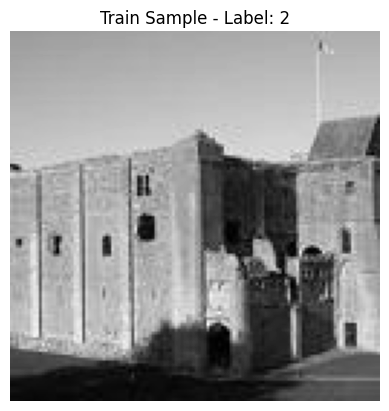

In [7]:
sample_features, sample_label = next(iter(train_dataloader))
plt.imshow(sample_features[0].reshape(128, 128), cmap='gray') 
plt.title(f"Train Sample - Label: {sample_label[0]}")
plt.axis('off')
plt.show()

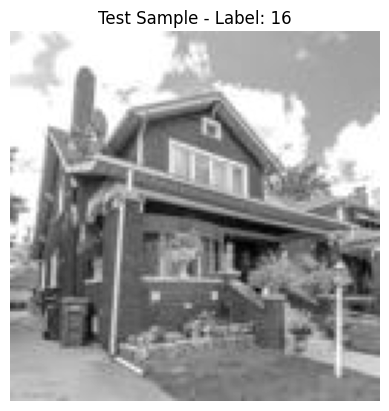

In [8]:
sample_features, sample_label = next(iter(test_dataloader))
plt.imshow(sample_features[0].reshape(128, 128), cmap='gray')  # Adjust the reshape dimensions as per your image size
plt.title(f"Test Sample - Label: {sample_label[0]}")
plt.axis('off')
plt.show()

In [9]:
input_dim = 16384  # 128x128
num_classes = 25  # Number of architectural styles
model = SamRBM(input_dim, num_classes)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
num_epochs = 1000
train_losses = []

In [12]:
for epoch in range(num_epochs):
    model.train()  
    train_loss = 0.0

    with tqdm(total=len(train_dataloader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as progress_bar:
        for features, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            progress_bar.set_postfix({"loss": loss.item()})
            progress_bar.update()
    train_loss /= len(train_dataloader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Average training loss: {train_loss:.4f}")

Epoch 1/1000: 100%|██████████| 56/56 [00:00<00:00, 120.41batch/s, loss=800]    


Epoch 1/1000 - Average training loss: 1375.5674


Epoch 2/1000: 100%|██████████| 56/56 [00:00<00:00, 130.37batch/s, loss=754]


Epoch 2/1000 - Average training loss: 617.7482


Epoch 3/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=405]


Epoch 3/1000 - Average training loss: 504.6740


Epoch 4/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=425]


Epoch 4/1000 - Average training loss: 519.6376


Epoch 5/1000: 100%|██████████| 56/56 [00:00<00:00, 127.70batch/s, loss=475]


Epoch 5/1000 - Average training loss: 498.7938


Epoch 6/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=530]


Epoch 6/1000 - Average training loss: 456.0414


Epoch 7/1000: 100%|██████████| 56/56 [00:00<00:00, 128.28batch/s, loss=368]


Epoch 7/1000 - Average training loss: 519.8481


Epoch 8/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=402]


Epoch 8/1000 - Average training loss: 429.3306


Epoch 9/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=596]


Epoch 9/1000 - Average training loss: 346.4438


Epoch 10/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=407]


Epoch 10/1000 - Average training loss: 370.8185


Epoch 11/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=401]


Epoch 11/1000 - Average training loss: 295.4085


Epoch 12/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=164]


Epoch 12/1000 - Average training loss: 324.5742


Epoch 13/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=363]


Epoch 13/1000 - Average training loss: 247.0872


Epoch 14/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=354]


Epoch 14/1000 - Average training loss: 353.5515


Epoch 15/1000: 100%|██████████| 56/56 [00:00<00:00, 114.43batch/s, loss=153]


Epoch 15/1000 - Average training loss: 257.2138


Epoch 16/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=280]


Epoch 16/1000 - Average training loss: 288.2167


Epoch 17/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=182]


Epoch 17/1000 - Average training loss: 225.0098


Epoch 18/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=85.9]


Epoch 18/1000 - Average training loss: 166.6689


Epoch 19/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=85.7]


Epoch 19/1000 - Average training loss: 143.1854


Epoch 20/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=202] 


Epoch 20/1000 - Average training loss: 162.8703


Epoch 21/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=227] 


Epoch 21/1000 - Average training loss: 217.3340


Epoch 22/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=139] 


Epoch 22/1000 - Average training loss: 113.2676


Epoch 23/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=129] 


Epoch 23/1000 - Average training loss: 182.4048


Epoch 24/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=137] 


Epoch 24/1000 - Average training loss: 103.1840


Epoch 25/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=90.6]


Epoch 25/1000 - Average training loss: 113.7906


Epoch 26/1000: 100%|██████████| 56/56 [00:00<00:00, 106.21batch/s, loss=109] 


Epoch 26/1000 - Average training loss: 127.3170


Epoch 27/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=131] 


Epoch 27/1000 - Average training loss: 149.6763


Epoch 28/1000: 100%|██████████| 56/56 [00:00<00:00, 109.10batch/s, loss=192] 


Epoch 28/1000 - Average training loss: 122.8999


Epoch 29/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=70.1]


Epoch 29/1000 - Average training loss: 109.8587


Epoch 30/1000: 100%|██████████| 56/56 [00:00<00:00, 112.60batch/s, loss=43.4]


Epoch 30/1000 - Average training loss: 59.1587


Epoch 31/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=111] 


Epoch 31/1000 - Average training loss: 80.6524


Epoch 32/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=87.4]


Epoch 32/1000 - Average training loss: 63.2712


Epoch 33/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=62.1]


Epoch 33/1000 - Average training loss: 95.8201


Epoch 34/1000: 100%|██████████| 56/56 [00:00<00:00, 124.58batch/s, loss=86.4]


Epoch 34/1000 - Average training loss: 113.6588


Epoch 35/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=22.4]


Epoch 35/1000 - Average training loss: 35.9406


Epoch 36/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=20.5]


Epoch 36/1000 - Average training loss: 21.2551


Epoch 37/1000: 100%|██████████| 56/56 [00:00<00:00, 109.96batch/s, loss=56.9]


Epoch 37/1000 - Average training loss: 34.8052


Epoch 38/1000: 100%|██████████| 56/56 [00:00<00:00, 120.84batch/s, loss=29.7]


Epoch 38/1000 - Average training loss: 67.0926


Epoch 39/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=15.7]


Epoch 39/1000 - Average training loss: 24.1367


Epoch 40/1000: 100%|██████████| 56/56 [00:00<00:00, 125.98batch/s, loss=34.7]


Epoch 40/1000 - Average training loss: 35.1880


Epoch 41/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=50.4]


Epoch 41/1000 - Average training loss: 30.7944


Epoch 42/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=28.3]


Epoch 42/1000 - Average training loss: 34.2829


Epoch 43/1000: 100%|██████████| 56/56 [00:00<00:00, 127.70batch/s, loss=17.1]


Epoch 43/1000 - Average training loss: 18.9027


Epoch 44/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=15.6]


Epoch 44/1000 - Average training loss: 20.4522


Epoch 45/1000: 100%|██████████| 56/56 [00:00<00:00, 122.14batch/s, loss=68.4]


Epoch 45/1000 - Average training loss: 37.4636


Epoch 46/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=23.1]


Epoch 46/1000 - Average training loss: 30.8283


Epoch 47/1000: 100%|██████████| 56/56 [00:00<00:00, 124.58batch/s, loss=16]  


Epoch 47/1000 - Average training loss: 19.0689


Epoch 48/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=19.7]


Epoch 48/1000 - Average training loss: 27.8978


Epoch 49/1000: 100%|██████████| 56/56 [00:00<00:00, 125.98batch/s, loss=18.6]


Epoch 49/1000 - Average training loss: 17.9903


Epoch 50/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=13.3]


Epoch 50/1000 - Average training loss: 11.6514


Epoch 51/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=14.5]


Epoch 51/1000 - Average training loss: 9.3343


Epoch 52/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=8.42]


Epoch 52/1000 - Average training loss: 13.0574


Epoch 53/1000: 100%|██████████| 56/56 [00:00<00:00, 127.41batch/s, loss=8.73]


Epoch 53/1000 - Average training loss: 7.8583


Epoch 54/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=3.47]


Epoch 54/1000 - Average training loss: 9.0832


Epoch 55/1000: 100%|██████████| 56/56 [00:00<00:00, 125.98batch/s, loss=14.6]


Epoch 55/1000 - Average training loss: 9.1756


Epoch 56/1000: 100%|██████████| 56/56 [00:00<00:00, 128.57batch/s, loss=5.41]


Epoch 56/1000 - Average training loss: 6.3360


Epoch 57/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=19.8]


Epoch 57/1000 - Average training loss: 20.1204


Epoch 58/1000: 100%|██████████| 56/56 [00:00<00:00, 130.06batch/s, loss=2.76]


Epoch 58/1000 - Average training loss: 9.4196


Epoch 59/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=5.85]


Epoch 59/1000 - Average training loss: 4.1144


Epoch 60/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=2.97]


Epoch 60/1000 - Average training loss: 3.3650


Epoch 61/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=3.44]


Epoch 61/1000 - Average training loss: 4.6773


Epoch 62/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=5.06]


Epoch 62/1000 - Average training loss: 3.7898


Epoch 63/1000: 100%|██████████| 56/56 [00:00<00:00, 107.03batch/s, loss=1.56]


Epoch 63/1000 - Average training loss: 2.4563


Epoch 64/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=2.96]


Epoch 64/1000 - Average training loss: 3.0853


Epoch 65/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=1.09]


Epoch 65/1000 - Average training loss: 3.1163


Epoch 66/1000: 100%|██████████| 56/56 [00:00<00:00, 129.17batch/s, loss=2.72]


Epoch 66/1000 - Average training loss: 3.6142


Epoch 67/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=3.66]


Epoch 67/1000 - Average training loss: 3.4619


Epoch 68/1000: 100%|██████████| 56/56 [00:00<00:00, 138.73batch/s, loss=3.3] 


Epoch 68/1000 - Average training loss: 2.0179


Epoch 69/1000: 100%|██████████| 56/56 [00:00<00:00, 136.38batch/s, loss=2.08]


Epoch 69/1000 - Average training loss: 2.2102


Epoch 70/1000: 100%|██████████| 56/56 [00:00<00:00, 134.10batch/s, loss=1.85]


Epoch 70/1000 - Average training loss: 4.7204


Epoch 71/1000: 100%|██████████| 56/56 [00:00<00:00, 142.25batch/s, loss=6.91]


Epoch 71/1000 - Average training loss: 2.3316


Epoch 72/1000: 100%|██████████| 56/56 [00:00<00:00, 131.59batch/s, loss=3.62]


Epoch 72/1000 - Average training loss: 6.0373


Epoch 73/1000: 100%|██████████| 56/56 [00:00<00:00, 137.38batch/s, loss=1.53]


Epoch 73/1000 - Average training loss: 2.6842


Epoch 74/1000: 100%|██████████| 56/56 [00:00<00:00, 144.81batch/s, loss=1.6] 


Epoch 74/1000 - Average training loss: 2.1052


Epoch 75/1000: 100%|██████████| 56/56 [00:00<00:00, 127.70batch/s, loss=1.03]


Epoch 75/1000 - Average training loss: 1.8688


Epoch 76/1000: 100%|██████████| 56/56 [00:00<00:00, 141.89batch/s, loss=0.915]


Epoch 76/1000 - Average training loss: 2.1358


Epoch 77/1000: 100%|██████████| 56/56 [00:00<00:00, 139.08batch/s, loss=1.31] 


Epoch 77/1000 - Average training loss: 1.5335


Epoch 78/1000: 100%|██████████| 56/56 [00:00<00:00, 135.07batch/s, loss=1.55] 


Epoch 78/1000 - Average training loss: 1.5921


Epoch 79/1000: 100%|██████████| 56/56 [00:00<00:00, 137.71batch/s, loss=1.45] 


Epoch 79/1000 - Average training loss: 1.2371


Epoch 80/1000: 100%|██████████| 56/56 [00:00<00:00, 140.47batch/s, loss=1.69] 


Epoch 80/1000 - Average training loss: 1.4526


Epoch 81/1000: 100%|██████████| 56/56 [00:00<00:00, 137.71batch/s, loss=1.62]


Epoch 81/1000 - Average training loss: 2.4518


Epoch 82/1000: 100%|██████████| 56/56 [00:00<00:00, 136.38batch/s, loss=1.46] 


Epoch 82/1000 - Average training loss: 1.2972


Epoch 83/1000: 100%|██████████| 56/56 [00:00<00:00, 138.73batch/s, loss=1.38] 


Epoch 83/1000 - Average training loss: 1.2065


Epoch 84/1000: 100%|██████████| 56/56 [00:00<00:00, 128.87batch/s, loss=0.804]


Epoch 84/1000 - Average training loss: 0.9374


Epoch 85/1000: 100%|██████████| 56/56 [00:00<00:00, 146.32batch/s, loss=0.985]


Epoch 85/1000 - Average training loss: 0.9086


Epoch 86/1000: 100%|██████████| 56/56 [00:00<00:00, 142.61batch/s, loss=0.575]


Epoch 86/1000 - Average training loss: 0.8373


Epoch 87/1000: 100%|██████████| 56/56 [00:00<00:00, 138.39batch/s, loss=2.01] 


Epoch 87/1000 - Average training loss: 1.3603


Epoch 88/1000: 100%|██████████| 56/56 [00:00<00:00, 136.71batch/s, loss=1.34] 


Epoch 88/1000 - Average training loss: 1.5288


Epoch 89/1000: 100%|██████████| 56/56 [00:00<00:00, 132.52batch/s, loss=3.79]


Epoch 89/1000 - Average training loss: 4.4875


Epoch 90/1000: 100%|██████████| 56/56 [00:00<00:00, 142.25batch/s, loss=2.84]


Epoch 90/1000 - Average training loss: 5.7737


Epoch 91/1000: 100%|██████████| 56/56 [00:00<00:00, 135.72batch/s, loss=1.13]


Epoch 91/1000 - Average training loss: 1.9312


Epoch 92/1000: 100%|██████████| 56/56 [00:00<00:00, 136.05batch/s, loss=1.55] 


Epoch 92/1000 - Average training loss: 1.0084


Epoch 93/1000: 100%|██████████| 56/56 [00:00<00:00, 135.39batch/s, loss=0.991]


Epoch 93/1000 - Average training loss: 0.9528


Epoch 94/1000: 100%|██████████| 56/56 [00:00<00:00, 139.42batch/s, loss=1.03] 


Epoch 94/1000 - Average training loss: 0.8621


Epoch 95/1000: 100%|██████████| 56/56 [00:00<00:00, 137.38batch/s, loss=0.656]


Epoch 95/1000 - Average training loss: 0.9430


Epoch 96/1000: 100%|██████████| 56/56 [00:00<00:00, 141.89batch/s, loss=0.955]


Epoch 96/1000 - Average training loss: 1.2404


Epoch 97/1000: 100%|██████████| 56/56 [00:00<00:00, 130.97batch/s, loss=1.68] 


Epoch 97/1000 - Average training loss: 1.0387


Epoch 98/1000: 100%|██████████| 56/56 [00:00<00:00, 126.83batch/s, loss=1.31] 


Epoch 98/1000 - Average training loss: 1.1445


Epoch 99/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=0.668]


Epoch 99/1000 - Average training loss: 1.0072


Epoch 100/1000: 100%|██████████| 56/56 [00:00<00:00, 136.38batch/s, loss=0.57] 


Epoch 100/1000 - Average training loss: 0.9665


Epoch 101/1000: 100%|██████████| 56/56 [00:00<00:00, 131.28batch/s, loss=0.96] 


Epoch 101/1000 - Average training loss: 0.9049


Epoch 102/1000: 100%|██████████| 56/56 [00:00<00:00, 135.39batch/s, loss=35]   


Epoch 102/1000 - Average training loss: 7.9980


Epoch 103/1000: 100%|██████████| 56/56 [00:00<00:00, 132.83batch/s, loss=549] 


Epoch 103/1000 - Average training loss: 246.0266


Epoch 104/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=436]


Epoch 104/1000 - Average training loss: 433.7102


Epoch 105/1000: 100%|██████████| 56/56 [00:00<00:00, 134.10batch/s, loss=157]


Epoch 105/1000 - Average training loss: 233.1139


Epoch 106/1000: 100%|██████████| 56/56 [00:00<00:00, 125.42batch/s, loss=103] 


Epoch 106/1000 - Average training loss: 139.7709


Epoch 107/1000: 100%|██████████| 56/56 [00:00<00:00, 137.38batch/s, loss=98.5]


Epoch 107/1000 - Average training loss: 83.7541


Epoch 108/1000: 100%|██████████| 56/56 [00:00<00:00, 128.58batch/s, loss=45.6]


Epoch 108/1000 - Average training loss: 75.4338


Epoch 109/1000: 100%|██████████| 56/56 [00:00<00:00, 140.82batch/s, loss=47.4]


Epoch 109/1000 - Average training loss: 49.9504


Epoch 110/1000: 100%|██████████| 56/56 [00:00<00:00, 98.57batch/s, loss=17.3] 


Epoch 110/1000 - Average training loss: 41.3074


Epoch 111/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=8.91]


Epoch 111/1000 - Average training loss: 14.8584


Epoch 112/1000: 100%|██████████| 56/56 [00:00<00:00, 127.12batch/s, loss=10.6]


Epoch 112/1000 - Average training loss: 9.2138


Epoch 113/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=7.54]


Epoch 113/1000 - Average training loss: 11.7787


Epoch 114/1000: 100%|██████████| 56/56 [00:00<00:00, 137.72batch/s, loss=4.68]


Epoch 114/1000 - Average training loss: 4.8842


Epoch 115/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=10]  


Epoch 115/1000 - Average training loss: 5.4636


Epoch 116/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=1.27]


Epoch 116/1000 - Average training loss: 4.7634


Epoch 117/1000: 100%|██████████| 56/56 [00:00<00:00, 131.28batch/s, loss=2.06]


Epoch 117/1000 - Average training loss: 2.3914


Epoch 118/1000: 100%|██████████| 56/56 [00:00<00:00, 136.71batch/s, loss=1.31]


Epoch 118/1000 - Average training loss: 1.8298


Epoch 119/1000: 100%|██████████| 56/56 [00:00<00:00, 137.04batch/s, loss=1.71]


Epoch 119/1000 - Average training loss: 2.2853


Epoch 120/1000: 100%|██████████| 56/56 [00:00<00:00, 139.08batch/s, loss=2.32]


Epoch 120/1000 - Average training loss: 2.0672


Epoch 121/1000: 100%|██████████| 56/56 [00:00<00:00, 143.70batch/s, loss=1.61] 


Epoch 121/1000 - Average training loss: 1.7042


Epoch 122/1000: 100%|██████████| 56/56 [00:00<00:00, 128.87batch/s, loss=1.09] 


Epoch 122/1000 - Average training loss: 1.2329


Epoch 123/1000: 100%|██████████| 56/56 [00:00<00:00, 135.72batch/s, loss=1.38] 


Epoch 123/1000 - Average training loss: 1.2116


Epoch 124/1000: 100%|██████████| 56/56 [00:00<00:00, 132.52batch/s, loss=1.03] 


Epoch 124/1000 - Average training loss: 1.4463


Epoch 125/1000: 100%|██████████| 56/56 [00:00<00:00, 144.81batch/s, loss=0.936]


Epoch 125/1000 - Average training loss: 0.9828


Epoch 126/1000: 100%|██████████| 56/56 [00:00<00:00, 137.04batch/s, loss=1.36] 


Epoch 126/1000 - Average training loss: 0.9905


Epoch 127/1000: 100%|██████████| 56/56 [00:00<00:00, 140.12batch/s, loss=5.3] 


Epoch 127/1000 - Average training loss: 2.0297


Epoch 128/1000: 100%|██████████| 56/56 [00:00<00:00, 133.46batch/s, loss=2.56]


Epoch 128/1000 - Average training loss: 5.2816


Epoch 129/1000: 100%|██████████| 56/56 [00:00<00:00, 141.17batch/s, loss=1.11]


Epoch 129/1000 - Average training loss: 2.0736


Epoch 130/1000: 100%|██████████| 56/56 [00:00<00:00, 138.05batch/s, loss=0.819]


Epoch 130/1000 - Average training loss: 1.0212


Epoch 131/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=1.41] 


Epoch 131/1000 - Average training loss: 0.8902


Epoch 132/1000: 100%|██████████| 56/56 [00:00<00:00, 137.04batch/s, loss=0.769]


Epoch 132/1000 - Average training loss: 0.8449


Epoch 133/1000: 100%|██████████| 56/56 [00:00<00:00, 140.47batch/s, loss=0.897]


Epoch 133/1000 - Average training loss: 0.8445


Epoch 134/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.806]


Epoch 134/1000 - Average training loss: 0.8607


Epoch 135/1000: 100%|██████████| 56/56 [00:00<00:00, 106.62batch/s, loss=0.69] 


Epoch 135/1000 - Average training loss: 0.7725


Epoch 136/1000: 100%|██████████| 56/56 [00:00<00:00, 131.90batch/s, loss=0.721]


Epoch 136/1000 - Average training loss: 0.7609


Epoch 137/1000: 100%|██████████| 56/56 [00:00<00:00, 123.76batch/s, loss=0.914]


Epoch 137/1000 - Average training loss: 0.7590


Epoch 138/1000: 100%|██████████| 56/56 [00:00<00:00, 126.26batch/s, loss=0.882]


Epoch 138/1000 - Average training loss: 0.8680


Epoch 139/1000: 100%|██████████| 56/56 [00:00<00:00, 134.10batch/s, loss=0.893]


Epoch 139/1000 - Average training loss: 0.9153


Epoch 140/1000: 100%|██████████| 56/56 [00:00<00:00, 127.70batch/s, loss=0.873]


Epoch 140/1000 - Average training loss: 1.0067


Epoch 141/1000: 100%|██████████| 56/56 [00:00<00:00, 133.78batch/s, loss=1.18] 


Epoch 141/1000 - Average training loss: 0.8937


Epoch 142/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=3.68] 


Epoch 142/1000 - Average training loss: 0.9941


Epoch 143/1000: 100%|██████████| 56/56 [00:00<00:00, 133.78batch/s, loss=99.6]


Epoch 143/1000 - Average training loss: 45.5914


Epoch 144/1000: 100%|██████████| 56/56 [00:00<00:00, 132.52batch/s, loss=257]


Epoch 144/1000 - Average training loss: 240.6064


Epoch 145/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=339]


Epoch 145/1000 - Average training loss: 326.5037


Epoch 146/1000: 100%|██████████| 56/56 [00:00<00:00, 127.12batch/s, loss=139] 


Epoch 146/1000 - Average training loss: 190.1182


Epoch 147/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=79.7]


Epoch 147/1000 - Average training loss: 109.9663


Epoch 148/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=20.8]


Epoch 148/1000 - Average training loss: 53.0689


Epoch 149/1000: 100%|██████████| 56/56 [00:00<00:00, 127.99batch/s, loss=20.7]


Epoch 149/1000 - Average training loss: 23.4931


Epoch 150/1000: 100%|██████████| 56/56 [00:00<00:00, 140.47batch/s, loss=7.81]


Epoch 150/1000 - Average training loss: 13.0635


Epoch 151/1000: 100%|██████████| 56/56 [00:00<00:00, 143.34batch/s, loss=14.8]


Epoch 151/1000 - Average training loss: 10.9473


Epoch 152/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=3.85]


Epoch 152/1000 - Average training loss: 5.5093


Epoch 153/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=2.71]


Epoch 153/1000 - Average training loss: 2.9476


Epoch 154/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=2.05]


Epoch 154/1000 - Average training loss: 2.3324


Epoch 155/1000: 100%|██████████| 56/56 [00:00<00:00, 129.76batch/s, loss=1.27]


Epoch 155/1000 - Average training loss: 1.7810


Epoch 156/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=1.36]


Epoch 156/1000 - Average training loss: 1.6424


Epoch 157/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=1.55]


Epoch 157/1000 - Average training loss: 1.7183


Epoch 158/1000: 100%|██████████| 56/56 [00:00<00:00, 144.07batch/s, loss=1.55] 


Epoch 158/1000 - Average training loss: 1.2908


Epoch 159/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=1.32] 


Epoch 159/1000 - Average training loss: 1.2388


Epoch 160/1000: 100%|██████████| 56/56 [00:00<00:00, 134.74batch/s, loss=1.26] 


Epoch 160/1000 - Average training loss: 1.0656


Epoch 161/1000: 100%|██████████| 56/56 [00:00<00:00, 138.73batch/s, loss=0.969]


Epoch 161/1000 - Average training loss: 1.2343


Epoch 162/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=0.866]


Epoch 162/1000 - Average training loss: 1.0568


Epoch 163/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=1.15] 


Epoch 163/1000 - Average training loss: 1.2195


Epoch 164/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=1.2]  


Epoch 164/1000 - Average training loss: 1.0511


Epoch 165/1000: 100%|██████████| 56/56 [00:00<00:00, 133.14batch/s, loss=0.737]


Epoch 165/1000 - Average training loss: 0.9346


Epoch 166/1000: 100%|██████████| 56/56 [00:00<00:00, 136.38batch/s, loss=0.858]


Epoch 166/1000 - Average training loss: 0.7396


Epoch 167/1000: 100%|██████████| 56/56 [00:00<00:00, 131.28batch/s, loss=0.674]


Epoch 167/1000 - Average training loss: 0.8698


Epoch 168/1000: 100%|██████████| 56/56 [00:00<00:00, 131.28batch/s, loss=0.904]


Epoch 168/1000 - Average training loss: 0.6948


Epoch 169/1000: 100%|██████████| 56/56 [00:00<00:00, 129.76batch/s, loss=9.22] 


Epoch 169/1000 - Average training loss: 2.5223


Epoch 170/1000: 100%|██████████| 56/56 [00:00<00:00, 124.58batch/s, loss=75.3]


Epoch 170/1000 - Average training loss: 47.5343


Epoch 171/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=184] 


Epoch 171/1000 - Average training loss: 141.4064


Epoch 172/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=148]


Epoch 172/1000 - Average training loss: 199.1702


Epoch 173/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=187] 


Epoch 173/1000 - Average training loss: 149.4240


Epoch 174/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=60.1]


Epoch 174/1000 - Average training loss: 85.5244


Epoch 175/1000: 100%|██████████| 56/56 [00:00<00:00, 114.67batch/s, loss=45.2]


Epoch 175/1000 - Average training loss: 44.5156


Epoch 176/1000: 100%|██████████| 56/56 [00:00<00:00, 105.22batch/s, loss=11.6]


Epoch 176/1000 - Average training loss: 37.9298


Epoch 177/1000: 100%|██████████| 56/56 [00:00<00:00, 130.67batch/s, loss=8.52]


Epoch 177/1000 - Average training loss: 10.7187


Epoch 178/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=4.61]


Epoch 178/1000 - Average training loss: 7.6723


Epoch 179/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=2.8] 


Epoch 179/1000 - Average training loss: 5.5377


Epoch 180/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=3]   


Epoch 180/1000 - Average training loss: 2.3227


Epoch 181/1000: 100%|██████████| 56/56 [00:00<00:00, 126.83batch/s, loss=1.47]


Epoch 181/1000 - Average training loss: 1.9899


Epoch 182/1000: 100%|██████████| 56/56 [00:00<00:00, 141.89batch/s, loss=1.21]


Epoch 182/1000 - Average training loss: 1.7059


Epoch 183/1000: 100%|██████████| 56/56 [00:00<00:00, 129.76batch/s, loss=1.17] 


Epoch 183/1000 - Average training loss: 1.2938


Epoch 184/1000: 100%|██████████| 56/56 [00:00<00:00, 139.08batch/s, loss=1.14] 


Epoch 184/1000 - Average training loss: 1.1541


Epoch 185/1000: 100%|██████████| 56/56 [00:00<00:00, 143.70batch/s, loss=0.818]


Epoch 185/1000 - Average training loss: 1.0284


Epoch 186/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=1.33] 


Epoch 186/1000 - Average training loss: 0.9645


Epoch 187/1000: 100%|██████████| 56/56 [00:00<00:00, 131.89batch/s, loss=0.822]


Epoch 187/1000 - Average training loss: 0.8207


Epoch 188/1000: 100%|██████████| 56/56 [00:00<00:00, 127.99batch/s, loss=1.09] 


Epoch 188/1000 - Average training loss: 0.7937


Epoch 189/1000: 100%|██████████| 56/56 [00:00<00:00, 130.06batch/s, loss=0.989]


Epoch 189/1000 - Average training loss: 0.8152


Epoch 190/1000: 100%|██████████| 56/56 [00:00<00:00, 132.52batch/s, loss=0.516]


Epoch 190/1000 - Average training loss: 0.7696


Epoch 191/1000: 100%|██████████| 56/56 [00:00<00:00, 139.77batch/s, loss=0.637]


Epoch 191/1000 - Average training loss: 0.7505


Epoch 192/1000: 100%|██████████| 56/56 [00:00<00:00, 134.74batch/s, loss=0.75] 


Epoch 192/1000 - Average training loss: 0.7024


Epoch 193/1000: 100%|██████████| 56/56 [00:00<00:00, 140.47batch/s, loss=0.743]


Epoch 193/1000 - Average training loss: 0.6433


Epoch 194/1000: 100%|██████████| 56/56 [00:00<00:00, 135.07batch/s, loss=0.365]


Epoch 194/1000 - Average training loss: 0.6603


Epoch 195/1000: 100%|██████████| 56/56 [00:00<00:00, 133.15batch/s, loss=1.17] 


Epoch 195/1000 - Average training loss: 0.8429


Epoch 196/1000: 100%|██████████| 56/56 [00:00<00:00, 132.52batch/s, loss=0.464]


Epoch 196/1000 - Average training loss: 0.9785


Epoch 197/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.615]


Epoch 197/1000 - Average training loss: 0.5704


Epoch 198/1000: 100%|██████████| 56/56 [00:00<00:00, 132.52batch/s, loss=0.645]


Epoch 198/1000 - Average training loss: 0.5482


Epoch 199/1000: 100%|██████████| 56/56 [00:00<00:00, 133.15batch/s, loss=0.926]


Epoch 199/1000 - Average training loss: 0.6483


Epoch 200/1000: 100%|██████████| 56/56 [00:00<00:00, 138.39batch/s, loss=99]   


Epoch 200/1000 - Average training loss: 22.2553


Epoch 201/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=266]


Epoch 201/1000 - Average training loss: 255.5447


Epoch 202/1000: 100%|██████████| 56/56 [00:00<00:00, 133.46batch/s, loss=310]


Epoch 202/1000 - Average training loss: 311.6984


Epoch 203/1000: 100%|██████████| 56/56 [00:00<00:00, 130.67batch/s, loss=154]


Epoch 203/1000 - Average training loss: 191.6206


Epoch 204/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=36.3]


Epoch 204/1000 - Average training loss: 93.0104


Epoch 205/1000: 100%|██████████| 56/56 [00:00<00:00, 126.26batch/s, loss=39.7]


Epoch 205/1000 - Average training loss: 37.3339


Epoch 206/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=15.1]


Epoch 206/1000 - Average training loss: 30.3528


Epoch 207/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=18.9]


Epoch 207/1000 - Average training loss: 13.5413


Epoch 208/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=5.01]


Epoch 208/1000 - Average training loss: 10.7284


Epoch 209/1000: 100%|██████████| 56/56 [00:00<00:00, 128.87batch/s, loss=3.8] 


Epoch 209/1000 - Average training loss: 3.4850


Epoch 210/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=2.04]


Epoch 210/1000 - Average training loss: 4.2678


Epoch 211/1000: 100%|██████████| 56/56 [00:00<00:00, 125.42batch/s, loss=1.89]


Epoch 211/1000 - Average training loss: 2.5403


Epoch 212/1000: 100%|██████████| 56/56 [00:00<00:00, 127.99batch/s, loss=1.49]


Epoch 212/1000 - Average training loss: 1.4903


Epoch 213/1000: 100%|██████████| 56/56 [00:00<00:00, 130.67batch/s, loss=1.18]


Epoch 213/1000 - Average training loss: 1.4575


Epoch 214/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=0.915]


Epoch 214/1000 - Average training loss: 1.4026


Epoch 215/1000: 100%|██████████| 56/56 [00:00<00:00, 127.12batch/s, loss=1.19] 


Epoch 215/1000 - Average training loss: 1.1062


Epoch 216/1000: 100%|██████████| 56/56 [00:00<00:00, 125.70batch/s, loss=0.947]


Epoch 216/1000 - Average training loss: 1.0220


Epoch 217/1000: 100%|██████████| 56/56 [00:00<00:00, 128.87batch/s, loss=0.703]


Epoch 217/1000 - Average training loss: 1.0803


Epoch 218/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=0.648]


Epoch 218/1000 - Average training loss: 0.7131


Epoch 219/1000: 100%|██████████| 56/56 [00:00<00:00, 129.16batch/s, loss=0.579]


Epoch 219/1000 - Average training loss: 0.6791


Epoch 220/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=0.732]


Epoch 220/1000 - Average training loss: 0.6801


Epoch 221/1000: 100%|██████████| 56/56 [00:00<00:00, 141.53batch/s, loss=1.16] 


Epoch 221/1000 - Average training loss: 0.7535


Epoch 222/1000: 100%|██████████| 56/56 [00:00<00:00, 130.97batch/s, loss=0.876]


Epoch 222/1000 - Average training loss: 0.9316


Epoch 223/1000: 100%|██████████| 56/56 [00:00<00:00, 133.78batch/s, loss=0.478]


Epoch 223/1000 - Average training loss: 0.6662


Epoch 224/1000: 100%|██████████| 56/56 [00:00<00:00, 133.78batch/s, loss=0.564]


Epoch 224/1000 - Average training loss: 0.5247


Epoch 225/1000: 100%|██████████| 56/56 [00:00<00:00, 135.07batch/s, loss=0.649]


Epoch 225/1000 - Average training loss: 0.5749


Epoch 226/1000: 100%|██████████| 56/56 [00:00<00:00, 131.28batch/s, loss=0.289]


Epoch 226/1000 - Average training loss: 0.6106


Epoch 227/1000: 100%|██████████| 56/56 [00:00<00:00, 138.05batch/s, loss=0.687]


Epoch 227/1000 - Average training loss: 0.6281


Epoch 228/1000: 100%|██████████| 56/56 [00:00<00:00, 138.73batch/s, loss=0.316]


Epoch 228/1000 - Average training loss: 0.5463


Epoch 229/1000: 100%|██████████| 56/56 [00:00<00:00, 141.17batch/s, loss=0.397]


Epoch 229/1000 - Average training loss: 0.4661


Epoch 230/1000: 100%|██████████| 56/56 [00:00<00:00, 129.46batch/s, loss=0.452]


Epoch 230/1000 - Average training loss: 0.5451


Epoch 231/1000: 100%|██████████| 56/56 [00:00<00:00, 130.06batch/s, loss=175] 


Epoch 231/1000 - Average training loss: 46.2176


Epoch 232/1000: 100%|██████████| 56/56 [00:00<00:00, 133.15batch/s, loss=327]


Epoch 232/1000 - Average training loss: 266.9521


Epoch 233/1000: 100%|██████████| 56/56 [00:00<00:00, 130.97batch/s, loss=188]


Epoch 233/1000 - Average training loss: 249.5333


Epoch 234/1000: 100%|██████████| 56/56 [00:00<00:00, 131.28batch/s, loss=114]


Epoch 234/1000 - Average training loss: 169.1488


Epoch 235/1000: 100%|██████████| 56/56 [00:00<00:00, 123.76batch/s, loss=24.8]


Epoch 235/1000 - Average training loss: 89.4057


Epoch 236/1000: 100%|██████████| 56/56 [00:00<00:00, 131.28batch/s, loss=34.5]


Epoch 236/1000 - Average training loss: 54.9053


Epoch 237/1000: 100%|██████████| 56/56 [00:00<00:00, 136.71batch/s, loss=13.3]


Epoch 237/1000 - Average training loss: 25.9398


Epoch 238/1000: 100%|██████████| 56/56 [00:00<00:00, 138.05batch/s, loss=15.9]


Epoch 238/1000 - Average training loss: 12.7465


Epoch 239/1000: 100%|██████████| 56/56 [00:00<00:00, 138.73batch/s, loss=11.8]


Epoch 239/1000 - Average training loss: 10.0217


Epoch 240/1000: 100%|██████████| 56/56 [00:00<00:00, 129.17batch/s, loss=10.4]


Epoch 240/1000 - Average training loss: 6.7411


Epoch 241/1000: 100%|██████████| 56/56 [00:00<00:00, 126.83batch/s, loss=3.02]


Epoch 241/1000 - Average training loss: 5.8987


Epoch 242/1000: 100%|██████████| 56/56 [00:00<00:00, 144.44batch/s, loss=2.41]


Epoch 242/1000 - Average training loss: 2.3945


Epoch 243/1000: 100%|██████████| 56/56 [00:00<00:00, 138.05batch/s, loss=1.05] 


Epoch 243/1000 - Average training loss: 1.3200


Epoch 244/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=0.778]


Epoch 244/1000 - Average training loss: 1.2524


Epoch 245/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.758]


Epoch 245/1000 - Average training loss: 1.1113


Epoch 246/1000: 100%|██████████| 56/56 [00:00<00:00, 133.14batch/s, loss=1.53] 


Epoch 246/1000 - Average training loss: 1.2210


Epoch 247/1000: 100%|██████████| 56/56 [00:00<00:00, 132.20batch/s, loss=0.321]


Epoch 247/1000 - Average training loss: 0.9283


Epoch 248/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=0.914]


Epoch 248/1000 - Average training loss: 0.7503


Epoch 249/1000: 100%|██████████| 56/56 [00:00<00:00, 127.99batch/s, loss=0.316]


Epoch 249/1000 - Average training loss: 0.6905


Epoch 250/1000: 100%|██████████| 56/56 [00:00<00:00, 134.10batch/s, loss=0.639]


Epoch 250/1000 - Average training loss: 0.5390


Epoch 251/1000: 100%|██████████| 56/56 [00:00<00:00, 134.10batch/s, loss=0.419]


Epoch 251/1000 - Average training loss: 0.5382


Epoch 252/1000: 100%|██████████| 56/56 [00:00<00:00, 136.05batch/s, loss=0.469]


Epoch 252/1000 - Average training loss: 0.5102


Epoch 253/1000: 100%|██████████| 56/56 [00:00<00:00, 136.05batch/s, loss=0.939]


Epoch 253/1000 - Average training loss: 0.4512


Epoch 254/1000: 100%|██████████| 56/56 [00:00<00:00, 134.10batch/s, loss=0.541]


Epoch 254/1000 - Average training loss: 0.5647


Epoch 255/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=0.674]


Epoch 255/1000 - Average training loss: 0.4437


Epoch 256/1000: 100%|██████████| 56/56 [00:00<00:00, 137.38batch/s, loss=0.401]


Epoch 256/1000 - Average training loss: 0.6881


Epoch 257/1000: 100%|██████████| 56/56 [00:00<00:00, 134.42batch/s, loss=0.144]


Epoch 257/1000 - Average training loss: 0.4126


Epoch 258/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.333]


Epoch 258/1000 - Average training loss: 0.4493


Epoch 259/1000: 100%|██████████| 56/56 [00:00<00:00, 130.97batch/s, loss=0.234]


Epoch 259/1000 - Average training loss: 0.4199


Epoch 260/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=0.65] 


Epoch 260/1000 - Average training loss: 0.4202


Epoch 261/1000: 100%|██████████| 56/56 [00:00<00:00, 131.89batch/s, loss=31.7] 


Epoch 261/1000 - Average training loss: 5.7997


Epoch 262/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=406] 


Epoch 262/1000 - Average training loss: 220.3597


Epoch 263/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=268]


Epoch 263/1000 - Average training loss: 347.4123


Epoch 264/1000: 100%|██████████| 56/56 [00:00<00:00, 132.83batch/s, loss=106] 


Epoch 264/1000 - Average training loss: 178.1869


Epoch 265/1000: 100%|██████████| 56/56 [00:00<00:00, 129.17batch/s, loss=123] 


Epoch 265/1000 - Average training loss: 76.6498


Epoch 266/1000: 100%|██████████| 56/56 [00:00<00:00, 128.58batch/s, loss=64.9]


Epoch 266/1000 - Average training loss: 72.4763


Epoch 267/1000: 100%|██████████| 56/56 [00:00<00:00, 136.71batch/s, loss=13.6]


Epoch 267/1000 - Average training loss: 20.6704


Epoch 268/1000: 100%|██████████| 56/56 [00:00<00:00, 125.42batch/s, loss=11.9]


Epoch 268/1000 - Average training loss: 17.4776


Epoch 269/1000: 100%|██████████| 56/56 [00:00<00:00, 133.14batch/s, loss=3.17]


Epoch 269/1000 - Average training loss: 6.9939


Epoch 270/1000: 100%|██████████| 56/56 [00:00<00:00, 135.72batch/s, loss=2.88]


Epoch 270/1000 - Average training loss: 2.6173


Epoch 271/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=2.82]


Epoch 271/1000 - Average training loss: 1.8569


Epoch 272/1000: 100%|██████████| 56/56 [00:00<00:00, 125.70batch/s, loss=0.507]


Epoch 272/1000 - Average training loss: 1.3800


Epoch 273/1000: 100%|██████████| 56/56 [00:00<00:00, 134.74batch/s, loss=1.83] 


Epoch 273/1000 - Average training loss: 1.1624


Epoch 274/1000: 100%|██████████| 56/56 [00:00<00:00, 140.47batch/s, loss=0.62] 


Epoch 274/1000 - Average training loss: 1.0466


Epoch 275/1000: 100%|██████████| 56/56 [00:00<00:00, 127.12batch/s, loss=0.84] 


Epoch 275/1000 - Average training loss: 0.9795


Epoch 276/1000: 100%|██████████| 56/56 [00:00<00:00, 135.07batch/s, loss=1.56] 


Epoch 276/1000 - Average training loss: 0.9850


Epoch 277/1000: 100%|██████████| 56/56 [00:00<00:00, 139.42batch/s, loss=0.556]


Epoch 277/1000 - Average training loss: 0.7585


Epoch 278/1000: 100%|██████████| 56/56 [00:00<00:00, 110.17batch/s, loss=0.308]


Epoch 278/1000 - Average training loss: 0.4985


Epoch 279/1000: 100%|██████████| 56/56 [00:00<00:00, 126.83batch/s, loss=0.657]


Epoch 279/1000 - Average training loss: 0.4154


Epoch 280/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=0.454]


Epoch 280/1000 - Average training loss: 0.4562


Epoch 281/1000: 100%|██████████| 56/56 [00:00<00:00, 111.04batch/s, loss=0.432]


Epoch 281/1000 - Average training loss: 0.4409


Epoch 282/1000: 100%|██████████| 56/56 [00:00<00:00, 121.35batch/s, loss=0.235]


Epoch 282/1000 - Average training loss: 0.4345


Epoch 283/1000: 100%|██████████| 56/56 [00:00<00:00, 127.99batch/s, loss=0.168]


Epoch 283/1000 - Average training loss: 0.3143


Epoch 284/1000: 100%|██████████| 56/56 [00:00<00:00, 128.27batch/s, loss=0.245]


Epoch 284/1000 - Average training loss: 0.2646


Epoch 285/1000: 100%|██████████| 56/56 [00:00<00:00, 127.41batch/s, loss=0.252]


Epoch 285/1000 - Average training loss: 0.2198


Epoch 286/1000: 100%|██████████| 56/56 [00:00<00:00, 133.15batch/s, loss=0.171]


Epoch 286/1000 - Average training loss: 0.2184


Epoch 287/1000: 100%|██████████| 56/56 [00:00<00:00, 124.58batch/s, loss=0.816]


Epoch 287/1000 - Average training loss: 0.5433


Epoch 288/1000: 100%|██████████| 56/56 [00:00<00:00, 137.04batch/s, loss=3.83]


Epoch 288/1000 - Average training loss: 5.4517


Epoch 289/1000: 100%|██████████| 56/56 [00:00<00:00, 135.39batch/s, loss=135] 


Epoch 289/1000 - Average training loss: 55.6142


Epoch 290/1000: 100%|██████████| 56/56 [00:00<00:00, 135.07batch/s, loss=395] 


Epoch 290/1000 - Average training loss: 232.9049


Epoch 291/1000: 100%|██████████| 56/56 [00:00<00:00, 132.83batch/s, loss=267]


Epoch 291/1000 - Average training loss: 272.7174


Epoch 292/1000: 100%|██████████| 56/56 [00:00<00:00, 130.97batch/s, loss=96.3]


Epoch 292/1000 - Average training loss: 136.6048


Epoch 293/1000: 100%|██████████| 56/56 [00:00<00:00, 134.10batch/s, loss=47.6]


Epoch 293/1000 - Average training loss: 69.8212


Epoch 294/1000: 100%|██████████| 56/56 [00:00<00:00, 131.59batch/s, loss=25.6]


Epoch 294/1000 - Average training loss: 42.8493


Epoch 295/1000: 100%|██████████| 56/56 [00:00<00:00, 142.25batch/s, loss=20.3]


Epoch 295/1000 - Average training loss: 17.3385


Epoch 296/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=9.11]


Epoch 296/1000 - Average training loss: 17.1754


Epoch 297/1000: 100%|██████████| 56/56 [00:00<00:00, 133.78batch/s, loss=5.23]


Epoch 297/1000 - Average training loss: 6.3949


Epoch 298/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=4.64]


Epoch 298/1000 - Average training loss: 5.0873


Epoch 299/1000: 100%|██████████| 56/56 [00:00<00:00, 130.37batch/s, loss=1.47]


Epoch 299/1000 - Average training loss: 2.2156


Epoch 300/1000: 100%|██████████| 56/56 [00:00<00:00, 137.38batch/s, loss=1.09] 


Epoch 300/1000 - Average training loss: 1.4492


Epoch 301/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=0.564]


Epoch 301/1000 - Average training loss: 1.1619


Epoch 302/1000: 100%|██████████| 56/56 [00:00<00:00, 134.42batch/s, loss=1.04] 


Epoch 302/1000 - Average training loss: 0.8972


Epoch 303/1000: 100%|██████████| 56/56 [00:00<00:00, 127.12batch/s, loss=0.743]


Epoch 303/1000 - Average training loss: 0.6684


Epoch 304/1000: 100%|██████████| 56/56 [00:00<00:00, 138.74batch/s, loss=0.57] 


Epoch 304/1000 - Average training loss: 0.5799


Epoch 305/1000: 100%|██████████| 56/56 [00:00<00:00, 139.08batch/s, loss=0.972]


Epoch 305/1000 - Average training loss: 0.5405


Epoch 306/1000: 100%|██████████| 56/56 [00:00<00:00, 127.12batch/s, loss=0.493]


Epoch 306/1000 - Average training loss: 0.4302


Epoch 307/1000: 100%|██████████| 56/56 [00:00<00:00, 139.42batch/s, loss=0.381]


Epoch 307/1000 - Average training loss: 0.3699


Epoch 308/1000: 100%|██████████| 56/56 [00:00<00:00, 105.81batch/s, loss=0.835]


Epoch 308/1000 - Average training loss: 0.3742


Epoch 309/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=0.155]


Epoch 309/1000 - Average training loss: 0.3526


Epoch 310/1000: 100%|██████████| 56/56 [00:00<00:00, 121.35batch/s, loss=0.202]


Epoch 310/1000 - Average training loss: 0.2221


Epoch 311/1000: 100%|██████████| 56/56 [00:00<00:00, 108.68batch/s, loss=0.287]


Epoch 311/1000 - Average training loss: 0.2334


Epoch 312/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=0.212]


Epoch 312/1000 - Average training loss: 0.3110


Epoch 313/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.851]


Epoch 313/1000 - Average training loss: 0.3393


Epoch 314/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=0.839]


Epoch 314/1000 - Average training loss: 0.5505


Epoch 315/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.372]


Epoch 315/1000 - Average training loss: 0.5756


Epoch 316/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.179] 


Epoch 316/1000 - Average training loss: 0.2567


Epoch 317/1000: 100%|██████████| 56/56 [00:00<00:00, 112.60batch/s, loss=0.155] 


Epoch 317/1000 - Average training loss: 0.1495


Epoch 318/1000: 100%|██████████| 56/56 [00:00<00:00, 109.53batch/s, loss=0.306] 


Epoch 318/1000 - Average training loss: 0.1631


Epoch 319/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.467] 


Epoch 319/1000 - Average training loss: 0.1918


Epoch 320/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.203] 


Epoch 320/1000 - Average training loss: 0.1735


Epoch 321/1000: 100%|██████████| 56/56 [00:00<00:00, 111.93batch/s, loss=0.162] 


Epoch 321/1000 - Average training loss: 0.1255


Epoch 322/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=0.161] 


Epoch 322/1000 - Average training loss: 0.1871


Epoch 323/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=10.6] 


Epoch 323/1000 - Average training loss: 1.5098


Epoch 324/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=419] 


Epoch 324/1000 - Average training loss: 293.3248


Epoch 325/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=401]


Epoch 325/1000 - Average training loss: 453.0830


Epoch 326/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=169]


Epoch 326/1000 - Average training loss: 275.4049


Epoch 327/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=59.2]


Epoch 327/1000 - Average training loss: 133.5715


Epoch 328/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=59.6]


Epoch 328/1000 - Average training loss: 60.1121


Epoch 329/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=38.5]


Epoch 329/1000 - Average training loss: 40.3922


Epoch 330/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=12]  


Epoch 330/1000 - Average training loss: 23.2904


Epoch 331/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=8.29]


Epoch 331/1000 - Average training loss: 13.1557


Epoch 332/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=7.56]


Epoch 332/1000 - Average training loss: 9.1215


Epoch 333/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=4.04]


Epoch 333/1000 - Average training loss: 5.2262


Epoch 334/1000: 100%|██████████| 56/56 [00:00<00:00, 123.76batch/s, loss=1.21]


Epoch 334/1000 - Average training loss: 4.5323


Epoch 335/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=1.3] 


Epoch 335/1000 - Average training loss: 2.8038


Epoch 336/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=2.18]


Epoch 336/1000 - Average training loss: 2.1670


Epoch 337/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=1.06] 


Epoch 337/1000 - Average training loss: 1.2851


Epoch 338/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=0.482]


Epoch 338/1000 - Average training loss: 1.2389


Epoch 339/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.605]


Epoch 339/1000 - Average training loss: 0.6960


Epoch 340/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=5.23] 


Epoch 340/1000 - Average training loss: 1.6219


Epoch 341/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=1.18] 


Epoch 341/1000 - Average training loss: 2.5813


Epoch 342/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.462]


Epoch 342/1000 - Average training loss: 0.6615


Epoch 343/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.248]


Epoch 343/1000 - Average training loss: 0.5315


Epoch 344/1000: 100%|██████████| 56/56 [00:00<00:00, 125.70batch/s, loss=0.649]


Epoch 344/1000 - Average training loss: 0.4070


Epoch 345/1000: 100%|██████████| 56/56 [00:00<00:00, 114.67batch/s, loss=0.294]


Epoch 345/1000 - Average training loss: 0.4943


Epoch 346/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=0.405]


Epoch 346/1000 - Average training loss: 0.3347


Epoch 347/1000: 100%|██████████| 56/56 [00:00<00:00, 125.70batch/s, loss=0.756]


Epoch 347/1000 - Average training loss: 0.9389


Epoch 348/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=0.726]


Epoch 348/1000 - Average training loss: 0.5484


Epoch 349/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=0.172] 


Epoch 349/1000 - Average training loss: 0.2044


Epoch 350/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=0.107] 


Epoch 350/1000 - Average training loss: 0.1335


Epoch 351/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=0.224] 


Epoch 351/1000 - Average training loss: 0.1639


Epoch 352/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=0.193]


Epoch 352/1000 - Average training loss: 0.2084


Epoch 353/1000: 100%|██████████| 56/56 [00:00<00:00, 110.17batch/s, loss=0.242] 


Epoch 353/1000 - Average training loss: 0.2356


Epoch 354/1000: 100%|██████████| 56/56 [00:00<00:00, 114.43batch/s, loss=0.281] 


Epoch 354/1000 - Average training loss: 0.2109


Epoch 355/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.136] 


Epoch 355/1000 - Average training loss: 0.2466


Epoch 356/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=0.0314]


Epoch 356/1000 - Average training loss: 0.1171


Epoch 357/1000: 100%|██████████| 56/56 [00:00<00:00, 121.35batch/s, loss=3.03]  


Epoch 357/1000 - Average training loss: 0.4423


Epoch 358/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=113] 


Epoch 358/1000 - Average training loss: 87.2619


Epoch 359/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=256]


Epoch 359/1000 - Average training loss: 312.5583


Epoch 360/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=143]


Epoch 360/1000 - Average training loss: 250.6034


Epoch 361/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=147] 


Epoch 361/1000 - Average training loss: 106.8793


Epoch 362/1000: 100%|██████████| 56/56 [00:00<00:00, 112.15batch/s, loss=56.7]


Epoch 362/1000 - Average training loss: 76.3131


Epoch 363/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=20.5]


Epoch 363/1000 - Average training loss: 38.3968


Epoch 364/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=21.1]


Epoch 364/1000 - Average training loss: 17.9161


Epoch 365/1000: 100%|██████████| 56/56 [00:00<00:00, 125.42batch/s, loss=7.89]


Epoch 365/1000 - Average training loss: 9.9504


Epoch 366/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=1.74]


Epoch 366/1000 - Average training loss: 3.4328


Epoch 367/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=1.82]


Epoch 367/1000 - Average training loss: 2.2761


Epoch 368/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=1.47]


Epoch 368/1000 - Average training loss: 1.9204


Epoch 369/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=1.62] 


Epoch 369/1000 - Average training loss: 1.7573


Epoch 370/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=1.02] 


Epoch 370/1000 - Average training loss: 1.0259


Epoch 371/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.443]


Epoch 371/1000 - Average training loss: 0.9415


Epoch 372/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.4]  


Epoch 372/1000 - Average training loss: 0.7233


Epoch 373/1000: 100%|██████████| 56/56 [00:00<00:00, 117.80batch/s, loss=0.289]


Epoch 373/1000 - Average training loss: 0.5436


Epoch 374/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.549]


Epoch 374/1000 - Average training loss: 0.4033


Epoch 375/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=0.29] 


Epoch 375/1000 - Average training loss: 0.7101


Epoch 376/1000: 100%|██████████| 56/56 [00:00<00:00, 111.04batch/s, loss=0.364]


Epoch 376/1000 - Average training loss: 0.2564


Epoch 377/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.158]


Epoch 377/1000 - Average training loss: 0.2566


Epoch 378/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=0.15] 


Epoch 378/1000 - Average training loss: 0.2541


Epoch 379/1000: 100%|██████████| 56/56 [00:00<00:00, 112.37batch/s, loss=0.0972]


Epoch 379/1000 - Average training loss: 0.1854


Epoch 380/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=0.351] 


Epoch 380/1000 - Average training loss: 0.2519


Epoch 381/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.117] 


Epoch 381/1000 - Average training loss: 0.3967


Epoch 382/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.0714]


Epoch 382/1000 - Average training loss: 0.1354


Epoch 383/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=0.297] 


Epoch 383/1000 - Average training loss: 0.1151


Epoch 384/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=0.185] 


Epoch 384/1000 - Average training loss: 0.1772


Epoch 385/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=0.0271]


Epoch 385/1000 - Average training loss: 0.1768


Epoch 386/1000: 100%|██████████| 56/56 [00:00<00:00, 110.60batch/s, loss=0.206] 


Epoch 386/1000 - Average training loss: 0.0845


Epoch 387/1000: 100%|██████████| 56/56 [00:00<00:00, 114.43batch/s, loss=0.278] 


Epoch 387/1000 - Average training loss: 0.1568


Epoch 388/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.135] 


Epoch 388/1000 - Average training loss: 0.1141


Epoch 389/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=0.787] 


Epoch 389/1000 - Average training loss: 0.2281


Epoch 390/1000: 100%|██████████| 56/56 [00:00<00:00, 112.15batch/s, loss=305] 


Epoch 390/1000 - Average training loss: 159.9480


Epoch 391/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=346]


Epoch 391/1000 - Average training loss: 468.0610


Epoch 392/1000: 100%|██████████| 56/56 [00:00<00:00, 112.60batch/s, loss=166]


Epoch 392/1000 - Average training loss: 295.8282


Epoch 393/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=63.3]


Epoch 393/1000 - Average training loss: 117.5312


Epoch 394/1000: 100%|██████████| 56/56 [00:00<00:00, 114.67batch/s, loss=31.7]


Epoch 394/1000 - Average training loss: 81.4002


Epoch 395/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=54.6]


Epoch 395/1000 - Average training loss: 46.3138


Epoch 396/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=23.7]


Epoch 396/1000 - Average training loss: 28.7677


Epoch 397/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=12.7]


Epoch 397/1000 - Average training loss: 20.1077


Epoch 398/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=2.31]


Epoch 398/1000 - Average training loss: 6.8771


Epoch 399/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=7.98]


Epoch 399/1000 - Average training loss: 3.8444


Epoch 400/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=4.42]


Epoch 400/1000 - Average training loss: 4.1607


Epoch 401/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=2.4]  


Epoch 401/1000 - Average training loss: 3.1550


Epoch 402/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=1.97]


Epoch 402/1000 - Average training loss: 1.7009


Epoch 403/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=0.51] 


Epoch 403/1000 - Average training loss: 1.4651


Epoch 404/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.822]


Epoch 404/1000 - Average training loss: 0.8373


Epoch 405/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=1.62] 


Epoch 405/1000 - Average training loss: 1.0075


Epoch 406/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=0.237]


Epoch 406/1000 - Average training loss: 0.5725


Epoch 407/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.461]


Epoch 407/1000 - Average training loss: 0.3372


Epoch 408/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.379]


Epoch 408/1000 - Average training loss: 0.5470


Epoch 409/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=0.538]


Epoch 409/1000 - Average training loss: 0.4836


Epoch 410/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=0.919]


Epoch 410/1000 - Average training loss: 0.6470


Epoch 411/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.323] 


Epoch 411/1000 - Average training loss: 0.4604


Epoch 412/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=0.0514]


Epoch 412/1000 - Average training loss: 0.3196


Epoch 413/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.209] 


Epoch 413/1000 - Average training loss: 0.2268


Epoch 414/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.0721]


Epoch 414/1000 - Average training loss: 0.2374


Epoch 415/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=0.375] 


Epoch 415/1000 - Average training loss: 0.2103


Epoch 416/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=0.629]


Epoch 416/1000 - Average training loss: 0.8933


Epoch 417/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=1.09] 


Epoch 417/1000 - Average training loss: 0.7799


Epoch 418/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=0.397]


Epoch 418/1000 - Average training loss: 0.7480


Epoch 419/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=0.868]


Epoch 419/1000 - Average training loss: 0.7551


Epoch 420/1000: 100%|██████████| 56/56 [00:00<00:00, 97.04batch/s, loss=0.0653]


Epoch 420/1000 - Average training loss: 0.2175


Epoch 421/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=0.061] 


Epoch 421/1000 - Average training loss: 0.1609


Epoch 422/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.0583]


Epoch 422/1000 - Average training loss: 0.0840


Epoch 423/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.0255]


Epoch 423/1000 - Average training loss: 0.1232


Epoch 424/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.0595]


Epoch 424/1000 - Average training loss: 0.1322


Epoch 425/1000: 100%|██████████| 56/56 [00:00<00:00, 123.76batch/s, loss=0.242] 


Epoch 425/1000 - Average training loss: 0.2336


Epoch 426/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=72.9]  


Epoch 426/1000 - Average training loss: 10.7189


Epoch 427/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=607] 


Epoch 427/1000 - Average training loss: 242.7977


Epoch 428/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=245]


Epoch 428/1000 - Average training loss: 312.6820


Epoch 429/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=89]  


Epoch 429/1000 - Average training loss: 252.6752


Epoch 430/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=82.5]


Epoch 430/1000 - Average training loss: 123.0357


Epoch 431/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=29.8]


Epoch 431/1000 - Average training loss: 33.6635


Epoch 432/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=36.9]


Epoch 432/1000 - Average training loss: 42.8008


Epoch 433/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=10.4]


Epoch 433/1000 - Average training loss: 13.7585


Epoch 434/1000: 100%|██████████| 56/56 [00:00<00:00, 109.10batch/s, loss=5.13]


Epoch 434/1000 - Average training loss: 9.0695


Epoch 435/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=1.83]


Epoch 435/1000 - Average training loss: 3.1834


Epoch 436/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=2.07]


Epoch 436/1000 - Average training loss: 2.1619


Epoch 437/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=1.28] 


Epoch 437/1000 - Average training loss: 1.7214


Epoch 438/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=1.31] 


Epoch 438/1000 - Average training loss: 1.3253


Epoch 439/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.912]


Epoch 439/1000 - Average training loss: 0.9113


Epoch 440/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=1.17] 


Epoch 440/1000 - Average training loss: 0.7558


Epoch 441/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=0.362]


Epoch 441/1000 - Average training loss: 0.6766


Epoch 442/1000: 100%|██████████| 56/56 [00:00<00:00, 125.42batch/s, loss=0.194]


Epoch 442/1000 - Average training loss: 0.5143


Epoch 443/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.444]


Epoch 443/1000 - Average training loss: 0.2186


Epoch 444/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.238]


Epoch 444/1000 - Average training loss: 0.3119


Epoch 445/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=0.0339]


Epoch 445/1000 - Average training loss: 0.1834


Epoch 446/1000: 100%|██████████| 56/56 [00:00<00:00, 126.55batch/s, loss=0.715] 


Epoch 446/1000 - Average training loss: 0.1679


Epoch 447/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=0.0554]


Epoch 447/1000 - Average training loss: 0.3694


Epoch 448/1000: 100%|██████████| 56/56 [00:00<00:00, 126.83batch/s, loss=0.481] 


Epoch 448/1000 - Average training loss: 0.2513


Epoch 449/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.273] 


Epoch 449/1000 - Average training loss: 0.3285


Epoch 450/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.135] 


Epoch 450/1000 - Average training loss: 0.1496


Epoch 451/1000: 100%|██████████| 56/56 [00:00<00:00, 110.61batch/s, loss=0.0395]


Epoch 451/1000 - Average training loss: 0.1755


Epoch 452/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=0.0987]


Epoch 452/1000 - Average training loss: 0.1372


Epoch 453/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=0.0559]


Epoch 453/1000 - Average training loss: 0.0689


Epoch 454/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.193] 


Epoch 454/1000 - Average training loss: 0.2428


Epoch 455/1000: 100%|██████████| 56/56 [00:00<00:00, 114.67batch/s, loss=0.175]


Epoch 455/1000 - Average training loss: 0.8378


Epoch 456/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=25.3]


Epoch 456/1000 - Average training loss: 6.0013


Epoch 457/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=344] 


Epoch 457/1000 - Average training loss: 186.5482


Epoch 458/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=318]


Epoch 458/1000 - Average training loss: 332.7900


Epoch 459/1000: 100%|██████████| 56/56 [00:00<00:00, 104.44batch/s, loss=87.4]


Epoch 459/1000 - Average training loss: 165.0809


Epoch 460/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=39.2]


Epoch 460/1000 - Average training loss: 74.6654


Epoch 461/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=66.2]


Epoch 461/1000 - Average training loss: 27.7460


Epoch 462/1000: 100%|██████████| 56/56 [00:00<00:00, 108.47batch/s, loss=42.1]


Epoch 462/1000 - Average training loss: 30.4478


Epoch 463/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=6.37]


Epoch 463/1000 - Average training loss: 15.5697


Epoch 464/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=4.32]


Epoch 464/1000 - Average training loss: 4.5853


Epoch 465/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=1.19]


Epoch 465/1000 - Average training loss: 2.2189


Epoch 466/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.88] 


Epoch 466/1000 - Average training loss: 1.2393


Epoch 467/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.589]


Epoch 467/1000 - Average training loss: 0.9059


Epoch 468/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=2.2]  


Epoch 468/1000 - Average training loss: 1.0097


Epoch 469/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.897]


Epoch 469/1000 - Average training loss: 1.0036


Epoch 470/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=0.125]


Epoch 470/1000 - Average training loss: 0.5153


Epoch 471/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.0966]


Epoch 471/1000 - Average training loss: 0.2955


Epoch 472/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=0.191]


Epoch 472/1000 - Average training loss: 0.3621


Epoch 473/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=0.444] 


Epoch 473/1000 - Average training loss: 0.3211


Epoch 474/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=0.179]


Epoch 474/1000 - Average training loss: 0.2057


Epoch 475/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.261] 


Epoch 475/1000 - Average training loss: 0.1618


Epoch 476/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.0771]


Epoch 476/1000 - Average training loss: 0.1148


Epoch 477/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.239]


Epoch 477/1000 - Average training loss: 0.7255


Epoch 478/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=0.175] 


Epoch 478/1000 - Average training loss: 0.2285


Epoch 479/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.0321]


Epoch 479/1000 - Average training loss: 0.1377


Epoch 480/1000: 100%|██████████| 56/56 [00:00<00:00, 108.26batch/s, loss=0.0595]


Epoch 480/1000 - Average training loss: 0.1024


Epoch 481/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.0166]


Epoch 481/1000 - Average training loss: 0.0553


Epoch 482/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.101] 


Epoch 482/1000 - Average training loss: 0.0467


Epoch 483/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.0761]


Epoch 483/1000 - Average training loss: 0.0599


Epoch 484/1000: 100%|██████████| 56/56 [00:00<00:00, 108.05batch/s, loss=0.122] 


Epoch 484/1000 - Average training loss: 0.0807


Epoch 485/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.0193]


Epoch 485/1000 - Average training loss: 0.0536


Epoch 486/1000: 100%|██████████| 56/56 [00:00<00:00, 106.82batch/s, loss=0.205] 


Epoch 486/1000 - Average training loss: 0.2223


Epoch 487/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=235] 


Epoch 487/1000 - Average training loss: 98.4177


Epoch 488/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=416]


Epoch 488/1000 - Average training loss: 349.2085


Epoch 489/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=144]


Epoch 489/1000 - Average training loss: 359.0376


Epoch 490/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=76.9]


Epoch 490/1000 - Average training loss: 178.1252


Epoch 491/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=30]  


Epoch 491/1000 - Average training loss: 46.0190


Epoch 492/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=26.1]


Epoch 492/1000 - Average training loss: 72.1408


Epoch 493/1000: 100%|██████████| 56/56 [00:00<00:00, 124.58batch/s, loss=10.5]


Epoch 493/1000 - Average training loss: 22.1558


Epoch 494/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=8.41]


Epoch 494/1000 - Average training loss: 17.7102


Epoch 495/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=5.8] 


Epoch 495/1000 - Average training loss: 6.1705


Epoch 496/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=3.94]


Epoch 496/1000 - Average training loss: 4.1231


Epoch 497/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=5.33]


Epoch 497/1000 - Average training loss: 4.4637


Epoch 498/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=1.71]


Epoch 498/1000 - Average training loss: 3.3957


Epoch 499/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=1.22] 


Epoch 499/1000 - Average training loss: 1.2434


Epoch 500/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.973]


Epoch 500/1000 - Average training loss: 0.9769


Epoch 501/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=0.251]


Epoch 501/1000 - Average training loss: 0.6189


Epoch 502/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=0.429]


Epoch 502/1000 - Average training loss: 0.5221


Epoch 503/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=0.158]


Epoch 503/1000 - Average training loss: 0.3213


Epoch 504/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.66]  


Epoch 504/1000 - Average training loss: 0.2431


Epoch 505/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.388]


Epoch 505/1000 - Average training loss: 0.4180


Epoch 506/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=0.114] 


Epoch 506/1000 - Average training loss: 0.1924


Epoch 507/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=0.294] 


Epoch 507/1000 - Average training loss: 0.1826


Epoch 508/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.645]


Epoch 508/1000 - Average training loss: 0.9339


Epoch 509/1000: 100%|██████████| 56/56 [00:00<00:00, 107.43batch/s, loss=0.0189]


Epoch 509/1000 - Average training loss: 0.3041


Epoch 510/1000: 100%|██████████| 56/56 [00:00<00:00, 111.93batch/s, loss=0.00901]


Epoch 510/1000 - Average training loss: 0.1569


Epoch 511/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=0.0629]


Epoch 511/1000 - Average training loss: 0.1110


Epoch 512/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.0371]


Epoch 512/1000 - Average training loss: 0.1879


Epoch 513/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.697] 


Epoch 513/1000 - Average training loss: 0.5178


Epoch 514/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.282] 


Epoch 514/1000 - Average training loss: 0.3086


Epoch 515/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=26.1]  


Epoch 515/1000 - Average training loss: 4.6341


Epoch 516/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=149] 


Epoch 516/1000 - Average training loss: 125.7933


Epoch 517/1000: 100%|██████████| 56/56 [00:00<00:00, 106.01batch/s, loss=172]


Epoch 517/1000 - Average training loss: 240.6446


Epoch 518/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=137] 


Epoch 518/1000 - Average training loss: 158.6339


Epoch 519/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=34.8]


Epoch 519/1000 - Average training loss: 71.3031


Epoch 520/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=29.3]


Epoch 520/1000 - Average training loss: 42.0415


Epoch 521/1000: 100%|██████████| 56/56 [00:00<00:00, 112.15batch/s, loss=5.15]


Epoch 521/1000 - Average training loss: 16.7252


Epoch 522/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=8.62]


Epoch 522/1000 - Average training loss: 7.6690


Epoch 523/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=2.86]


Epoch 523/1000 - Average training loss: 3.1429


Epoch 524/1000: 100%|██████████| 56/56 [00:00<00:00, 124.58batch/s, loss=1.06] 


Epoch 524/1000 - Average training loss: 2.8294


Epoch 525/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=0.853]


Epoch 525/1000 - Average training loss: 1.6025


Epoch 526/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.545]


Epoch 526/1000 - Average training loss: 0.9730


Epoch 527/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.798]


Epoch 527/1000 - Average training loss: 0.4814


Epoch 528/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.81] 


Epoch 528/1000 - Average training loss: 0.5062


Epoch 529/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=0.998]


Epoch 529/1000 - Average training loss: 0.5147


Epoch 530/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.0339]


Epoch 530/1000 - Average training loss: 0.3587


Epoch 531/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=0.0817]


Epoch 531/1000 - Average training loss: 0.1320


Epoch 532/1000: 100%|██████████| 56/56 [00:00<00:00, 109.96batch/s, loss=0.257] 


Epoch 532/1000 - Average training loss: 0.2938


Epoch 533/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=0.0753]


Epoch 533/1000 - Average training loss: 0.3782


Epoch 534/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.0789]


Epoch 534/1000 - Average training loss: 0.1386


Epoch 535/1000: 100%|██████████| 56/56 [00:00<00:00, 112.15batch/s, loss=0.034] 


Epoch 535/1000 - Average training loss: 0.0867


Epoch 536/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.398] 


Epoch 536/1000 - Average training loss: 0.1501


Epoch 537/1000: 100%|██████████| 56/56 [00:00<00:00, 114.67batch/s, loss=0.272]


Epoch 537/1000 - Average training loss: 1.3349


Epoch 538/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.114] 


Epoch 538/1000 - Average training loss: 0.2433


Epoch 539/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.177] 


Epoch 539/1000 - Average training loss: 0.2805


Epoch 540/1000: 100%|██████████| 56/56 [00:00<00:00, 106.21batch/s, loss=0.0171]


Epoch 540/1000 - Average training loss: 0.1147


Epoch 541/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=160]  


Epoch 541/1000 - Average training loss: 25.0602


Epoch 542/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=202]


Epoch 542/1000 - Average training loss: 193.7957


Epoch 543/1000: 100%|██████████| 56/56 [00:00<00:00, 111.93batch/s, loss=321]


Epoch 543/1000 - Average training loss: 258.9486


Epoch 544/1000: 100%|██████████| 56/56 [00:00<00:00, 108.47batch/s, loss=72] 


Epoch 544/1000 - Average training loss: 151.9318


Epoch 545/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=33.3]


Epoch 545/1000 - Average training loss: 69.8117


Epoch 546/1000: 100%|██████████| 56/56 [00:00<00:00, 109.31batch/s, loss=11.5]


Epoch 546/1000 - Average training loss: 16.1944


Epoch 547/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=5.22]


Epoch 547/1000 - Average training loss: 8.9397


Epoch 548/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=3.66]


Epoch 548/1000 - Average training loss: 4.0712


Epoch 549/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=3.11]


Epoch 549/1000 - Average training loss: 3.4359


Epoch 550/1000: 100%|██████████| 56/56 [00:00<00:00, 108.89batch/s, loss=2.4] 


Epoch 550/1000 - Average training loss: 3.7861


Epoch 551/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.536]


Epoch 551/1000 - Average training loss: 2.2978


Epoch 552/1000: 100%|██████████| 56/56 [00:00<00:00, 105.41batch/s, loss=0.599]


Epoch 552/1000 - Average training loss: 0.7886


Epoch 553/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=0.523]


Epoch 553/1000 - Average training loss: 0.5045


Epoch 554/1000: 100%|██████████| 56/56 [00:00<00:00, 112.37batch/s, loss=0.292]


Epoch 554/1000 - Average training loss: 0.4071


Epoch 555/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.887] 


Epoch 555/1000 - Average training loss: 0.2831


Epoch 556/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.207] 


Epoch 556/1000 - Average training loss: 0.3250


Epoch 557/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.231] 


Epoch 557/1000 - Average training loss: 0.2188


Epoch 558/1000: 100%|██████████| 56/56 [00:00<00:00, 108.26batch/s, loss=0.379] 


Epoch 558/1000 - Average training loss: 0.2383


Epoch 559/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.059] 


Epoch 559/1000 - Average training loss: 0.1243


Epoch 560/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.244] 


Epoch 560/1000 - Average training loss: 0.2246


Epoch 561/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.332] 


Epoch 561/1000 - Average training loss: 0.2161


Epoch 562/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.0764]


Epoch 562/1000 - Average training loss: 0.0944


Epoch 563/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=0.246] 


Epoch 563/1000 - Average training loss: 0.1209


Epoch 564/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=0.142] 


Epoch 564/1000 - Average training loss: 0.3828


Epoch 565/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.00755]


Epoch 565/1000 - Average training loss: 0.1292


Epoch 566/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.0176]


Epoch 566/1000 - Average training loss: 0.0784


Epoch 567/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=0.00392]


Epoch 567/1000 - Average training loss: 0.0599


Epoch 568/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.0281] 


Epoch 568/1000 - Average training loss: 0.0817


Epoch 569/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=1.12]  


Epoch 569/1000 - Average training loss: 0.4059


Epoch 570/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.533]


Epoch 570/1000 - Average training loss: 0.9617


Epoch 571/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=0.934] 


Epoch 571/1000 - Average training loss: 0.3291


Epoch 572/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.0846]


Epoch 572/1000 - Average training loss: 0.2263


Epoch 573/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.171]  


Epoch 573/1000 - Average training loss: 0.1524


Epoch 574/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.836]  


Epoch 574/1000 - Average training loss: 0.1743


Epoch 575/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=128]  


Epoch 575/1000 - Average training loss: 29.6176


Epoch 576/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=255]


Epoch 576/1000 - Average training loss: 378.8528


Epoch 577/1000: 100%|██████████| 56/56 [00:00<00:00, 107.43batch/s, loss=218]


Epoch 577/1000 - Average training loss: 409.4326


Epoch 578/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=117] 


Epoch 578/1000 - Average training loss: 180.9797


Epoch 579/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=72.8]


Epoch 579/1000 - Average training loss: 58.0678


Epoch 580/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=23.3]


Epoch 580/1000 - Average training loss: 62.5899


Epoch 581/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=7.95]


Epoch 581/1000 - Average training loss: 13.8845


Epoch 582/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=4.81]


Epoch 582/1000 - Average training loss: 6.2268


Epoch 583/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=9.58]


Epoch 583/1000 - Average training loss: 4.4537


Epoch 584/1000: 100%|██████████| 56/56 [00:00<00:00, 108.47batch/s, loss=3.6] 


Epoch 584/1000 - Average training loss: 3.8875


Epoch 585/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.813]


Epoch 585/1000 - Average training loss: 2.1144


Epoch 586/1000: 100%|██████████| 56/56 [00:00<00:00, 106.82batch/s, loss=0.438]


Epoch 586/1000 - Average training loss: 1.6561


Epoch 587/1000: 100%|██████████| 56/56 [00:00<00:00, 104.83batch/s, loss=1.16] 


Epoch 587/1000 - Average training loss: 1.2714


Epoch 588/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=0.418]


Epoch 588/1000 - Average training loss: 1.7339


Epoch 589/1000: 100%|██████████| 56/56 [00:00<00:00, 103.86batch/s, loss=0.159]


Epoch 589/1000 - Average training loss: 0.7330


Epoch 590/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=0.251]


Epoch 590/1000 - Average training loss: 0.3565


Epoch 591/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.0898]


Epoch 591/1000 - Average training loss: 0.3634


Epoch 592/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=0.453] 


Epoch 592/1000 - Average training loss: 0.2503


Epoch 593/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.264]


Epoch 593/1000 - Average training loss: 0.3375


Epoch 594/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=1.01]  


Epoch 594/1000 - Average training loss: 0.3265


Epoch 595/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.223]


Epoch 595/1000 - Average training loss: 0.6947


Epoch 596/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.0648]


Epoch 596/1000 - Average training loss: 0.2020


Epoch 597/1000: 100%|██████████| 56/56 [00:00<00:00, 111.04batch/s, loss=0.334] 


Epoch 597/1000 - Average training loss: 0.1076


Epoch 598/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.141] 


Epoch 598/1000 - Average training loss: 0.2496


Epoch 599/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=0.0759]


Epoch 599/1000 - Average training loss: 0.1272


Epoch 600/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.35]  


Epoch 600/1000 - Average training loss: 0.1648


Epoch 601/1000: 100%|██████████| 56/56 [00:00<00:00, 110.60batch/s, loss=0.0307]


Epoch 601/1000 - Average training loss: 0.4018


Epoch 602/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=0.217]  


Epoch 602/1000 - Average training loss: 0.0938


Epoch 603/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=0.0149]


Epoch 603/1000 - Average training loss: 0.1553


Epoch 604/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.00245]


Epoch 604/1000 - Average training loss: 0.0613


Epoch 605/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.0981] 


Epoch 605/1000 - Average training loss: 0.0432


Epoch 606/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.0357]


Epoch 606/1000 - Average training loss: 0.1648


Epoch 607/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.00929]


Epoch 607/1000 - Average training loss: 0.0604


Epoch 608/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=0.0438] 


Epoch 608/1000 - Average training loss: 0.0470


Epoch 609/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=20.8]  


Epoch 609/1000 - Average training loss: 1.2116


Epoch 610/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=262]


Epoch 610/1000 - Average training loss: 276.0794


Epoch 611/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=380]


Epoch 611/1000 - Average training loss: 468.2256


Epoch 612/1000: 100%|██████████| 56/56 [00:00<00:00, 109.53batch/s, loss=213] 


Epoch 612/1000 - Average training loss: 191.1526


Epoch 613/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=70.3]


Epoch 613/1000 - Average training loss: 83.9247


Epoch 614/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=30.4]


Epoch 614/1000 - Average training loss: 44.1573


Epoch 615/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=29.1]


Epoch 615/1000 - Average training loss: 39.1188


Epoch 616/1000: 100%|██████████| 56/56 [00:00<00:00, 108.05batch/s, loss=5.18]


Epoch 616/1000 - Average training loss: 13.7937


Epoch 617/1000: 100%|██████████| 56/56 [00:00<00:00, 113.73batch/s, loss=4.1] 


Epoch 617/1000 - Average training loss: 5.6845


Epoch 618/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=1.7] 


Epoch 618/1000 - Average training loss: 3.0624


Epoch 619/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=2.81]


Epoch 619/1000 - Average training loss: 3.3302


Epoch 620/1000: 100%|██████████| 56/56 [00:00<00:00, 114.67batch/s, loss=2.57] 


Epoch 620/1000 - Average training loss: 2.0072


Epoch 621/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=0.701]


Epoch 621/1000 - Average training loss: 1.1846


Epoch 622/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=1.31] 


Epoch 622/1000 - Average training loss: 1.1885


Epoch 623/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.376]


Epoch 623/1000 - Average training loss: 0.8217


Epoch 624/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.163]


Epoch 624/1000 - Average training loss: 0.2740


Epoch 625/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=0.344] 


Epoch 625/1000 - Average training loss: 0.3012


Epoch 626/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.197] 


Epoch 626/1000 - Average training loss: 0.2380


Epoch 627/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.0106]


Epoch 627/1000 - Average training loss: 0.1686


Epoch 628/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=0.116] 


Epoch 628/1000 - Average training loss: 0.1512


Epoch 629/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.552] 


Epoch 629/1000 - Average training loss: 0.3118


Epoch 630/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.219] 


Epoch 630/1000 - Average training loss: 0.3564


Epoch 631/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.271] 


Epoch 631/1000 - Average training loss: 0.7591


Epoch 632/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=0.186]


Epoch 632/1000 - Average training loss: 0.5340


Epoch 633/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=11.7] 


Epoch 633/1000 - Average training loss: 8.1249


Epoch 634/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=8.04]


Epoch 634/1000 - Average training loss: 11.2627


Epoch 635/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=6.2] 


Epoch 635/1000 - Average training loss: 12.6514


Epoch 636/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.773]


Epoch 636/1000 - Average training loss: 1.8516


Epoch 637/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.459] 


Epoch 637/1000 - Average training loss: 0.4252


Epoch 638/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.0146]


Epoch 638/1000 - Average training loss: 0.1692


Epoch 639/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.202] 


Epoch 639/1000 - Average training loss: 0.1005


Epoch 640/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=0.0763]


Epoch 640/1000 - Average training loss: 0.0877


Epoch 641/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.00178]


Epoch 641/1000 - Average training loss: 0.1024


Epoch 642/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=0.00737]


Epoch 642/1000 - Average training loss: 0.0588


Epoch 643/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=0.0739]


Epoch 643/1000 - Average training loss: 0.0677


Epoch 644/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.0806] 


Epoch 644/1000 - Average training loss: 0.0797


Epoch 645/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=0.159] 


Epoch 645/1000 - Average training loss: 0.1057


Epoch 646/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.00723]


Epoch 646/1000 - Average training loss: 0.0643


Epoch 647/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=0.0139] 


Epoch 647/1000 - Average training loss: 0.0485


Epoch 648/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=0.025] 


Epoch 648/1000 - Average training loss: 0.1487


Epoch 649/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=0.0523]


Epoch 649/1000 - Average training loss: 0.2114


Epoch 650/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.0129]


Epoch 650/1000 - Average training loss: 0.0782


Epoch 651/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=0.0163] 


Epoch 651/1000 - Average training loss: 0.0539


Epoch 652/1000: 100%|██████████| 56/56 [00:00<00:00, 111.70batch/s, loss=0.00848]


Epoch 652/1000 - Average training loss: 0.0313


Epoch 653/1000: 100%|██████████| 56/56 [00:00<00:00, 108.68batch/s, loss=0.0646]


Epoch 653/1000 - Average training loss: 0.0498


Epoch 654/1000: 100%|██████████| 56/56 [00:00<00:00, 125.70batch/s, loss=0.0895] 


Epoch 654/1000 - Average training loss: 0.0438


Epoch 655/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.0029] 


Epoch 655/1000 - Average training loss: 0.0442


Epoch 656/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.00374]


Epoch 656/1000 - Average training loss: 0.0457


Epoch 657/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=0.723]  


Epoch 657/1000 - Average training loss: 0.4634


Epoch 658/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=1.18e+3]


Epoch 658/1000 - Average training loss: 469.7653


Epoch 659/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=441]    


Epoch 659/1000 - Average training loss: 854.3177


Epoch 660/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=152]


Epoch 660/1000 - Average training loss: 316.9813


Epoch 661/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=100] 


Epoch 661/1000 - Average training loss: 149.1071


Epoch 662/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=63.1]


Epoch 662/1000 - Average training loss: 80.6602


Epoch 663/1000: 100%|██████████| 56/56 [00:00<00:00, 110.17batch/s, loss=63.4]


Epoch 663/1000 - Average training loss: 57.9468


Epoch 664/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=33.5]


Epoch 664/1000 - Average training loss: 45.3311


Epoch 665/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=39.6]


Epoch 665/1000 - Average training loss: 32.3876


Epoch 666/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=15.7]


Epoch 666/1000 - Average training loss: 18.9352


Epoch 667/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=9.27]


Epoch 667/1000 - Average training loss: 11.5767


Epoch 668/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=5.5] 


Epoch 668/1000 - Average training loss: 6.8274


Epoch 669/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=7.3] 


Epoch 669/1000 - Average training loss: 6.9982


Epoch 670/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=2.11]


Epoch 670/1000 - Average training loss: 5.6106


Epoch 671/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=2.84]


Epoch 671/1000 - Average training loss: 4.0913


Epoch 672/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=2.97]


Epoch 672/1000 - Average training loss: 3.4090


Epoch 673/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.755]


Epoch 673/1000 - Average training loss: 1.7342


Epoch 674/1000: 100%|██████████| 56/56 [00:00<00:00, 121.35batch/s, loss=2.99] 


Epoch 674/1000 - Average training loss: 1.5662


Epoch 675/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.403]


Epoch 675/1000 - Average training loss: 2.1636


Epoch 676/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=0.45] 


Epoch 676/1000 - Average training loss: 1.1746


Epoch 677/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.481]


Epoch 677/1000 - Average training loss: 0.6760


Epoch 678/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=23.2] 


Epoch 678/1000 - Average training loss: 5.5231


Epoch 679/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=21.3]


Epoch 679/1000 - Average training loss: 38.7990


Epoch 680/1000: 100%|██████████| 56/56 [00:00<00:00, 109.31batch/s, loss=1.18]


Epoch 680/1000 - Average training loss: 6.4965


Epoch 681/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.975]


Epoch 681/1000 - Average training loss: 1.5648


Epoch 682/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=1.08] 


Epoch 682/1000 - Average training loss: 0.9084


Epoch 683/1000: 100%|██████████| 56/56 [00:00<00:00, 108.89batch/s, loss=0.286]


Epoch 683/1000 - Average training loss: 0.6323


Epoch 684/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=0.0652]


Epoch 684/1000 - Average training loss: 0.3123


Epoch 685/1000: 100%|██████████| 56/56 [00:00<00:00, 110.17batch/s, loss=0.297] 


Epoch 685/1000 - Average training loss: 0.2361


Epoch 686/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.127] 


Epoch 686/1000 - Average training loss: 0.1729


Epoch 687/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.00401]


Epoch 687/1000 - Average training loss: 0.1751


Epoch 688/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.18]  


Epoch 688/1000 - Average training loss: 0.2086


Epoch 689/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=0.0031]


Epoch 689/1000 - Average training loss: 0.1426


Epoch 690/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.349] 


Epoch 690/1000 - Average training loss: 0.2185


Epoch 691/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.245]


Epoch 691/1000 - Average training loss: 0.8542


Epoch 692/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=0.142] 


Epoch 692/1000 - Average training loss: 0.7144


Epoch 693/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=0.00356]


Epoch 693/1000 - Average training loss: 0.1180


Epoch 694/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.014]  


Epoch 694/1000 - Average training loss: 0.0843


Epoch 695/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.419] 


Epoch 695/1000 - Average training loss: 0.1657


Epoch 696/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.0555]


Epoch 696/1000 - Average training loss: 0.2887


Epoch 697/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.00635]


Epoch 697/1000 - Average training loss: 0.1059


Epoch 698/1000: 100%|██████████| 56/56 [00:00<00:00, 121.35batch/s, loss=14.9]  


Epoch 698/1000 - Average training loss: 1.6590


Epoch 699/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=344] 


Epoch 699/1000 - Average training loss: 125.0219


Epoch 700/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=239]


Epoch 700/1000 - Average training loss: 309.4149


Epoch 701/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=156]


Epoch 701/1000 - Average training loss: 190.6582


Epoch 702/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=45.5]


Epoch 702/1000 - Average training loss: 74.1163


Epoch 703/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=16.8]


Epoch 703/1000 - Average training loss: 44.4268


Epoch 704/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=6.82]


Epoch 704/1000 - Average training loss: 14.3374


Epoch 705/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=4.42]


Epoch 705/1000 - Average training loss: 10.9153


Epoch 706/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=1.04] 


Epoch 706/1000 - Average training loss: 2.3160


Epoch 707/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=1.04]


Epoch 707/1000 - Average training loss: 2.3968


Epoch 708/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.746]


Epoch 708/1000 - Average training loss: 1.0708


Epoch 709/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=1.05] 


Epoch 709/1000 - Average training loss: 0.7136


Epoch 710/1000: 100%|██████████| 56/56 [00:00<00:00, 120.58batch/s, loss=0.579]


Epoch 710/1000 - Average training loss: 0.4970


Epoch 711/1000: 100%|██████████| 56/56 [00:00<00:00, 125.42batch/s, loss=0.468]


Epoch 711/1000 - Average training loss: 0.4735


Epoch 712/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=0.23]  


Epoch 712/1000 - Average training loss: 0.2812


Epoch 713/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.213] 


Epoch 713/1000 - Average training loss: 0.1551


Epoch 714/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=0.0266]


Epoch 714/1000 - Average training loss: 0.1824


Epoch 715/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=0.183] 


Epoch 715/1000 - Average training loss: 0.0850


Epoch 716/1000: 100%|██████████| 56/56 [00:00<00:00, 103.67batch/s, loss=0.0536]


Epoch 716/1000 - Average training loss: 0.1587


Epoch 717/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=0.0414] 


Epoch 717/1000 - Average training loss: 0.1045


Epoch 718/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=0.0124]


Epoch 718/1000 - Average training loss: 0.0715


Epoch 719/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.0114] 


Epoch 719/1000 - Average training loss: 0.2073


Epoch 720/1000: 100%|██████████| 56/56 [00:00<00:00, 112.37batch/s, loss=0.00668]


Epoch 720/1000 - Average training loss: 0.1810


Epoch 721/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.00179]


Epoch 721/1000 - Average training loss: 0.1278


Epoch 722/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.0594] 


Epoch 722/1000 - Average training loss: 0.0597


Epoch 723/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=0.0175] 


Epoch 723/1000 - Average training loss: 0.0669


Epoch 724/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.113] 


Epoch 724/1000 - Average training loss: 0.1159


Epoch 725/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.188] 


Epoch 725/1000 - Average training loss: 0.2052


Epoch 726/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.0365]


Epoch 726/1000 - Average training loss: 0.1310


Epoch 727/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.534]  


Epoch 727/1000 - Average training loss: 0.1463


Epoch 728/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=0.0159] 


Epoch 728/1000 - Average training loss: 0.2101


Epoch 729/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.442] 


Epoch 729/1000 - Average training loss: 0.2553


Epoch 730/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=8.3]  


Epoch 730/1000 - Average training loss: 2.5925


Epoch 731/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=384] 


Epoch 731/1000 - Average training loss: 105.2325


Epoch 732/1000: 100%|██████████| 56/56 [00:00<00:00, 121.36batch/s, loss=641]


Epoch 732/1000 - Average training loss: 372.2392


Epoch 733/1000: 100%|██████████| 56/56 [00:00<00:00, 108.89batch/s, loss=126]


Epoch 733/1000 - Average training loss: 265.4000


Epoch 734/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=88.3]


Epoch 734/1000 - Average training loss: 79.1742


Epoch 735/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=33.6]


Epoch 735/1000 - Average training loss: 54.4402


Epoch 736/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=10.5]


Epoch 736/1000 - Average training loss: 24.9168


Epoch 737/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=4.13]


Epoch 737/1000 - Average training loss: 8.8439


Epoch 738/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=2.71]


Epoch 738/1000 - Average training loss: 4.3671


Epoch 739/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=1.19] 


Epoch 739/1000 - Average training loss: 2.6069


Epoch 740/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=2.47] 


Epoch 740/1000 - Average training loss: 1.5443


Epoch 741/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.379]


Epoch 741/1000 - Average training loss: 1.0262


Epoch 742/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=1.28] 


Epoch 742/1000 - Average training loss: 0.8676


Epoch 743/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=1.1]  


Epoch 743/1000 - Average training loss: 0.6166


Epoch 744/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=0.406]


Epoch 744/1000 - Average training loss: 0.5234


Epoch 745/1000: 100%|██████████| 56/56 [00:00<00:00, 124.03batch/s, loss=0.452] 


Epoch 745/1000 - Average training loss: 0.3282


Epoch 746/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.115] 


Epoch 746/1000 - Average training loss: 0.2096


Epoch 747/1000: 100%|██████████| 56/56 [00:00<00:00, 126.26batch/s, loss=0.0216]


Epoch 747/1000 - Average training loss: 0.1343


Epoch 748/1000: 100%|██████████| 56/56 [00:00<00:00, 112.15batch/s, loss=1.96]  


Epoch 748/1000 - Average training loss: 0.5310


Epoch 749/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=0.0243]


Epoch 749/1000 - Average training loss: 0.7119


Epoch 750/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=0.135] 


Epoch 750/1000 - Average training loss: 0.1253


Epoch 751/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=0.569] 


Epoch 751/1000 - Average training loss: 0.1452


Epoch 752/1000: 100%|██████████| 56/56 [00:00<00:00, 110.39batch/s, loss=0.278] 


Epoch 752/1000 - Average training loss: 0.2170


Epoch 753/1000: 100%|██████████| 56/56 [00:00<00:00, 105.81batch/s, loss=0.00867]


Epoch 753/1000 - Average training loss: 0.1353


Epoch 754/1000: 100%|██████████| 56/56 [00:00<00:00, 110.17batch/s, loss=0.0291] 


Epoch 754/1000 - Average training loss: 0.0682


Epoch 755/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=0.14]   


Epoch 755/1000 - Average training loss: 0.0774


Epoch 756/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.161]  


Epoch 756/1000 - Average training loss: 0.0800


Epoch 757/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=0.0867]


Epoch 757/1000 - Average training loss: 0.3391


Epoch 758/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=0.181]  


Epoch 758/1000 - Average training loss: 0.1027


Epoch 759/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.0835] 


Epoch 759/1000 - Average training loss: 0.0701


Epoch 760/1000: 100%|██████████| 56/56 [00:00<00:00, 106.42batch/s, loss=0.0251] 


Epoch 760/1000 - Average training loss: 0.0351


Epoch 761/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.000402]


Epoch 761/1000 - Average training loss: 0.0605


Epoch 762/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=0.0184] 


Epoch 762/1000 - Average training loss: 0.0614


Epoch 763/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=183]   


Epoch 763/1000 - Average training loss: 76.8877


Epoch 764/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=375]


Epoch 764/1000 - Average training loss: 438.8486


Epoch 765/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=182]


Epoch 765/1000 - Average training loss: 297.4410


Epoch 766/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=57.8]


Epoch 766/1000 - Average training loss: 80.3897


Epoch 767/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=25.8]


Epoch 767/1000 - Average training loss: 59.4205


Epoch 768/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=20.6]


Epoch 768/1000 - Average training loss: 32.8332


Epoch 769/1000: 100%|██████████| 56/56 [00:00<00:00, 124.86batch/s, loss=8.3] 


Epoch 769/1000 - Average training loss: 18.8256


Epoch 770/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=4.53]


Epoch 770/1000 - Average training loss: 10.4313


Epoch 771/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=5.03]


Epoch 771/1000 - Average training loss: 3.8368


Epoch 772/1000: 100%|██████████| 56/56 [00:00<00:00, 123.49batch/s, loss=0.633]


Epoch 772/1000 - Average training loss: 2.2385


Epoch 773/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=0.417]


Epoch 773/1000 - Average training loss: 1.4743


Epoch 774/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.407]


Epoch 774/1000 - Average training loss: 1.0350


Epoch 775/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=0.0303]


Epoch 775/1000 - Average training loss: 0.5694


Epoch 776/1000: 100%|██████████| 56/56 [00:00<00:00, 124.58batch/s, loss=0.274]


Epoch 776/1000 - Average training loss: 0.3731


Epoch 777/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.591] 


Epoch 777/1000 - Average training loss: 0.2761


Epoch 778/1000: 100%|██████████| 56/56 [00:00<00:00, 123.76batch/s, loss=0.106] 


Epoch 778/1000 - Average training loss: 0.3358


Epoch 779/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=0.0105]


Epoch 779/1000 - Average training loss: 0.2334


Epoch 780/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.177] 


Epoch 780/1000 - Average training loss: 0.1780


Epoch 781/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.0871]


Epoch 781/1000 - Average training loss: 0.1214


Epoch 782/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.329] 


Epoch 782/1000 - Average training loss: 0.3354


Epoch 783/1000: 100%|██████████| 56/56 [00:00<00:00, 109.10batch/s, loss=5.14] 


Epoch 783/1000 - Average training loss: 1.0362


Epoch 784/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=5.17]


Epoch 784/1000 - Average training loss: 3.7689


Epoch 785/1000: 100%|██████████| 56/56 [00:00<00:00, 109.31batch/s, loss=0.316] 


Epoch 785/1000 - Average training loss: 1.0469


Epoch 786/1000: 100%|██████████| 56/56 [00:00<00:00, 112.15batch/s, loss=0.0378] 


Epoch 786/1000 - Average training loss: 0.1447


Epoch 787/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=0.00156]


Epoch 787/1000 - Average training loss: 0.0857


Epoch 788/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.00215]


Epoch 788/1000 - Average training loss: 0.0689


Epoch 789/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=0.354] 


Epoch 789/1000 - Average training loss: 0.1407


Epoch 790/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=0.201] 


Epoch 790/1000 - Average training loss: 0.4190


Epoch 791/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=0.00146]


Epoch 791/1000 - Average training loss: 0.1018


Epoch 792/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=0.00323]


Epoch 792/1000 - Average training loss: 0.1100


Epoch 793/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=0.148]  


Epoch 793/1000 - Average training loss: 0.0771


Epoch 794/1000: 100%|██████████| 56/56 [00:00<00:00, 125.70batch/s, loss=0.0581] 


Epoch 794/1000 - Average training loss: 0.0893


Epoch 795/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=0.159]  


Epoch 795/1000 - Average training loss: 0.1005


Epoch 796/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.317] 


Epoch 796/1000 - Average training loss: 0.4536


Epoch 797/1000: 100%|██████████| 56/56 [00:00<00:00, 122.68batch/s, loss=1.95] 


Epoch 797/1000 - Average training loss: 0.7885


Epoch 798/1000: 100%|██████████| 56/56 [00:00<00:00, 111.70batch/s, loss=582] 


Epoch 798/1000 - Average training loss: 288.4278


Epoch 799/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=514]


Epoch 799/1000 - Average training loss: 444.9135


Epoch 800/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=236]


Epoch 800/1000 - Average training loss: 283.6465


Epoch 801/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=66.8]


Epoch 801/1000 - Average training loss: 117.6649


Epoch 802/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=18.4]


Epoch 802/1000 - Average training loss: 34.3013


Epoch 803/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=11.4]


Epoch 803/1000 - Average training loss: 14.1022


Epoch 804/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=7.68]


Epoch 804/1000 - Average training loss: 9.1786


Epoch 805/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=8.81]


Epoch 805/1000 - Average training loss: 9.2176


Epoch 806/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=1.26]


Epoch 806/1000 - Average training loss: 5.1475


Epoch 807/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=1.22]


Epoch 807/1000 - Average training loss: 2.2842


Epoch 808/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=2.91] 


Epoch 808/1000 - Average training loss: 1.3978


Epoch 809/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=0.769]


Epoch 809/1000 - Average training loss: 1.8930


Epoch 810/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.949]


Epoch 810/1000 - Average training loss: 0.9711


Epoch 811/1000: 100%|██████████| 56/56 [00:00<00:00, 109.96batch/s, loss=0.324]


Epoch 811/1000 - Average training loss: 0.6826


Epoch 812/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=0.0636]


Epoch 812/1000 - Average training loss: 1.0563


Epoch 813/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.781]


Epoch 813/1000 - Average training loss: 0.6981


Epoch 814/1000: 100%|██████████| 56/56 [00:00<00:00, 117.05batch/s, loss=0.536]


Epoch 814/1000 - Average training loss: 0.5936


Epoch 815/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=1.63]  


Epoch 815/1000 - Average training loss: 0.2906


Epoch 816/1000: 100%|██████████| 56/56 [00:00<00:00, 111.70batch/s, loss=0.754]


Epoch 816/1000 - Average training loss: 0.9951


Epoch 817/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=7.11]  


Epoch 817/1000 - Average training loss: 3.6342


Epoch 818/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=56.8]


Epoch 818/1000 - Average training loss: 69.7855


Epoch 819/1000: 100%|██████████| 56/56 [00:00<00:00, 108.89batch/s, loss=23.4]


Epoch 819/1000 - Average training loss: 41.6626


Epoch 820/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=3.2] 


Epoch 820/1000 - Average training loss: 10.7195


Epoch 821/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.694]


Epoch 821/1000 - Average training loss: 1.3049


Epoch 822/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=0.125] 


Epoch 822/1000 - Average training loss: 0.4197


Epoch 823/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.167] 


Epoch 823/1000 - Average training loss: 0.3465


Epoch 824/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=0.0115] 


Epoch 824/1000 - Average training loss: 0.1996


Epoch 825/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.062] 


Epoch 825/1000 - Average training loss: 0.2035


Epoch 826/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=0.0341]


Epoch 826/1000 - Average training loss: 0.1850


Epoch 827/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=0.171]  


Epoch 827/1000 - Average training loss: 0.0524


Epoch 828/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.129] 


Epoch 828/1000 - Average training loss: 0.0959


Epoch 829/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.0129] 


Epoch 829/1000 - Average training loss: 0.1186


Epoch 830/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.00193]


Epoch 830/1000 - Average training loss: 0.0602


Epoch 831/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=0.000149]


Epoch 831/1000 - Average training loss: 0.0604


Epoch 832/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.00195]


Epoch 832/1000 - Average training loss: 0.0484


Epoch 833/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.0534] 


Epoch 833/1000 - Average training loss: 0.0406


Epoch 834/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=0.00458]


Epoch 834/1000 - Average training loss: 0.1617


Epoch 835/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=0.00932]


Epoch 835/1000 - Average training loss: 0.0544


Epoch 836/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=0.0125] 


Epoch 836/1000 - Average training loss: 0.0712


Epoch 837/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=0.189]  


Epoch 837/1000 - Average training loss: 0.0619


Epoch 838/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.00893]


Epoch 838/1000 - Average training loss: 0.1545


Epoch 839/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.121]  


Epoch 839/1000 - Average training loss: 0.0748


Epoch 840/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.25]   


Epoch 840/1000 - Average training loss: 0.0574


Epoch 841/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=0.0044]


Epoch 841/1000 - Average training loss: 0.1291


Epoch 842/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.577] 


Epoch 842/1000 - Average training loss: 0.4994


Epoch 843/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=0.164]  


Epoch 843/1000 - Average training loss: 0.1785


Epoch 844/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.00527]


Epoch 844/1000 - Average training loss: 0.1177


Epoch 845/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.00255]


Epoch 845/1000 - Average training loss: 0.0905


Epoch 846/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=0.00266]


Epoch 846/1000 - Average training loss: 0.0765


Epoch 847/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=0.0179] 


Epoch 847/1000 - Average training loss: 0.0495


Epoch 848/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.00631]


Epoch 848/1000 - Average training loss: 0.0842


Epoch 849/1000: 100%|██████████| 56/56 [00:00<00:00, 102.72batch/s, loss=0.164]  


Epoch 849/1000 - Average training loss: 0.1297


Epoch 850/1000: 100%|██████████| 56/56 [00:00<00:00, 109.53batch/s, loss=0.163] 


Epoch 850/1000 - Average training loss: 0.3965


Epoch 851/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.0812] 


Epoch 851/1000 - Average training loss: 0.2252


Epoch 852/1000: 100%|██████████| 56/56 [00:00<00:00, 104.24batch/s, loss=88.3] 


Epoch 852/1000 - Average training loss: 8.2430


Epoch 853/1000: 100%|██████████| 56/56 [00:00<00:00, 107.85batch/s, loss=456]    


Epoch 853/1000 - Average training loss: 663.3863


Epoch 854/1000: 100%|██████████| 56/56 [00:00<00:00, 109.31batch/s, loss=219]    


Epoch 854/1000 - Average training loss: 543.4041


Epoch 855/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=106]


Epoch 855/1000 - Average training loss: 266.3558


Epoch 856/1000: 100%|██████████| 56/56 [00:00<00:00, 111.70batch/s, loss=45]  


Epoch 856/1000 - Average training loss: 114.1335


Epoch 857/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=99.6]


Epoch 857/1000 - Average training loss: 60.0816


Epoch 858/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=27.6]


Epoch 858/1000 - Average training loss: 39.9530


Epoch 859/1000: 100%|██████████| 56/56 [00:00<00:00, 115.14batch/s, loss=15.1]


Epoch 859/1000 - Average training loss: 28.3823


Epoch 860/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=8.56]


Epoch 860/1000 - Average training loss: 20.5643


Epoch 861/1000: 100%|██████████| 56/56 [00:00<00:00, 122.14batch/s, loss=15.4]


Epoch 861/1000 - Average training loss: 8.5554


Epoch 862/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=7.17]


Epoch 862/1000 - Average training loss: 10.0219


Epoch 863/1000: 100%|██████████| 56/56 [00:00<00:00, 112.37batch/s, loss=1.37]


Epoch 863/1000 - Average training loss: 5.4395


Epoch 864/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=2.73] 


Epoch 864/1000 - Average training loss: 2.3378


Epoch 865/1000: 100%|██████████| 56/56 [00:00<00:00, 110.17batch/s, loss=0.372]


Epoch 865/1000 - Average training loss: 1.6809


Epoch 866/1000: 100%|██████████| 56/56 [00:00<00:00, 110.61batch/s, loss=2.55] 


Epoch 866/1000 - Average training loss: 2.2169


Epoch 867/1000: 100%|██████████| 56/56 [00:00<00:00, 125.42batch/s, loss=0.599]


Epoch 867/1000 - Average training loss: 1.2865


Epoch 868/1000: 100%|██████████| 56/56 [00:00<00:00, 109.31batch/s, loss=3.78] 


Epoch 868/1000 - Average training loss: 1.5202


Epoch 869/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=1.25] 


Epoch 869/1000 - Average training loss: 1.1303


Epoch 870/1000: 100%|██████████| 56/56 [00:00<00:00, 106.01batch/s, loss=1.48] 


Epoch 870/1000 - Average training loss: 0.8079


Epoch 871/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=1.1]  


Epoch 871/1000 - Average training loss: 1.1036


Epoch 872/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.495] 


Epoch 872/1000 - Average training loss: 0.8478


Epoch 873/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=0.0515]


Epoch 873/1000 - Average training loss: 1.0717


Epoch 874/1000: 100%|██████████| 56/56 [00:00<00:00, 112.60batch/s, loss=0.273] 


Epoch 874/1000 - Average training loss: 0.2794


Epoch 875/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=0.759] 


Epoch 875/1000 - Average training loss: 0.4484


Epoch 876/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=0.128]


Epoch 876/1000 - Average training loss: 0.3994


Epoch 877/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=0.178] 


Epoch 877/1000 - Average training loss: 0.2650


Epoch 878/1000: 100%|██████████| 56/56 [00:00<00:00, 125.14batch/s, loss=0.0408]


Epoch 878/1000 - Average training loss: 0.2663


Epoch 879/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=0.209]  


Epoch 879/1000 - Average training loss: 0.1301


Epoch 880/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.0162] 


Epoch 880/1000 - Average training loss: 0.1233


Epoch 881/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.00108]


Epoch 881/1000 - Average training loss: 0.0795


Epoch 882/1000: 100%|██████████| 56/56 [00:00<00:00, 103.10batch/s, loss=14.7]   


Epoch 882/1000 - Average training loss: 1.8418


Epoch 883/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=11.7]


Epoch 883/1000 - Average training loss: 25.3856


Epoch 884/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=2.05]


Epoch 884/1000 - Average training loss: 8.1113


Epoch 885/1000: 100%|██████████| 56/56 [00:00<00:00, 103.66batch/s, loss=0.705] 


Epoch 885/1000 - Average training loss: 0.9451


Epoch 886/1000: 100%|██████████| 56/56 [00:00<00:00, 114.43batch/s, loss=0.548] 


Epoch 886/1000 - Average training loss: 0.2991


Epoch 887/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.0655] 


Epoch 887/1000 - Average training loss: 0.1521


Epoch 888/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=0.0133] 


Epoch 888/1000 - Average training loss: 0.1091


Epoch 889/1000: 100%|██████████| 56/56 [00:00<00:00, 109.10batch/s, loss=0.000946]


Epoch 889/1000 - Average training loss: 0.0813


Epoch 890/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.2]   


Epoch 890/1000 - Average training loss: 0.1616


Epoch 891/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=9.1]   


Epoch 891/1000 - Average training loss: 1.0693


Epoch 892/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=2.47] 


Epoch 892/1000 - Average training loss: 4.7397


Epoch 893/1000: 100%|██████████| 56/56 [00:00<00:00, 111.70batch/s, loss=0.206] 


Epoch 893/1000 - Average training loss: 0.8390


Epoch 894/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.695]


Epoch 894/1000 - Average training loss: 2.0699


Epoch 895/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=0.0279]


Epoch 895/1000 - Average training loss: 0.6138


Epoch 896/1000: 100%|██████████| 56/56 [00:00<00:00, 113.97batch/s, loss=0.00853]


Epoch 896/1000 - Average training loss: 0.0784


Epoch 897/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.0859]  


Epoch 897/1000 - Average training loss: 0.0605


Epoch 898/1000: 100%|██████████| 56/56 [00:00<00:00, 108.26batch/s, loss=6.46e-5]


Epoch 898/1000 - Average training loss: 0.1241


Epoch 899/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=0.0473]  


Epoch 899/1000 - Average training loss: 0.1321


Epoch 900/1000: 100%|██████████| 56/56 [00:00<00:00, 121.88batch/s, loss=0.00186] 


Epoch 900/1000 - Average training loss: 0.0642


Epoch 901/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=0.00275]


Epoch 901/1000 - Average training loss: 0.0744


Epoch 902/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=0.0137]  


Epoch 902/1000 - Average training loss: 0.1812


Epoch 903/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=39]   


Epoch 903/1000 - Average training loss: 3.8167


Epoch 904/1000: 100%|██████████| 56/56 [00:00<00:00, 102.72batch/s, loss=418]


Epoch 904/1000 - Average training loss: 469.9031


Epoch 905/1000: 100%|██████████| 56/56 [00:00<00:00, 113.28batch/s, loss=262]


Epoch 905/1000 - Average training loss: 495.5516


Epoch 906/1000: 100%|██████████| 56/56 [00:00<00:00, 104.83batch/s, loss=73.3]


Epoch 906/1000 - Average training loss: 208.1017


Epoch 907/1000: 100%|██████████| 56/56 [00:00<00:00, 99.80batch/s, loss=85.6] 


Epoch 907/1000 - Average training loss: 105.7638


Epoch 908/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=25.4]


Epoch 908/1000 - Average training loss: 50.6714


Epoch 909/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=16.3]


Epoch 909/1000 - Average training loss: 17.4033


Epoch 910/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=3.34]


Epoch 910/1000 - Average training loss: 8.9057


Epoch 911/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=5.8] 


Epoch 911/1000 - Average training loss: 8.8578


Epoch 912/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=6.94]


Epoch 912/1000 - Average training loss: 4.8992


Epoch 913/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=2.48] 


Epoch 913/1000 - Average training loss: 3.3833


Epoch 914/1000: 100%|██████████| 56/56 [00:00<00:00, 108.68batch/s, loss=6.37] 


Epoch 914/1000 - Average training loss: 3.4467


Epoch 915/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=4.69] 


Epoch 915/1000 - Average training loss: 2.0846


Epoch 916/1000: 100%|██████████| 56/56 [00:00<00:00, 109.31batch/s, loss=1.4]  


Epoch 916/1000 - Average training loss: 2.2208


Epoch 917/1000: 100%|██████████| 56/56 [00:00<00:00, 111.48batch/s, loss=0.257]


Epoch 917/1000 - Average training loss: 0.8156


Epoch 918/1000: 100%|██████████| 56/56 [00:00<00:00, 109.53batch/s, loss=0.95] 


Epoch 918/1000 - Average training loss: 0.9339


Epoch 919/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.257]


Epoch 919/1000 - Average training loss: 0.6001


Epoch 920/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=0.299] 


Epoch 920/1000 - Average training loss: 0.4111


Epoch 921/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=1.77] 


Epoch 921/1000 - Average training loss: 1.1740


Epoch 922/1000: 100%|██████████| 56/56 [00:00<00:00, 121.62batch/s, loss=0.289] 


Epoch 922/1000 - Average training loss: 0.5560


Epoch 923/1000: 100%|██████████| 56/56 [00:00<00:00, 119.04batch/s, loss=0.655] 


Epoch 923/1000 - Average training loss: 0.3467


Epoch 924/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.641] 


Epoch 924/1000 - Average training loss: 0.3399


Epoch 925/1000: 100%|██████████| 56/56 [00:00<00:00, 111.93batch/s, loss=0.928]


Epoch 925/1000 - Average training loss: 0.9688


Epoch 926/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.00943]


Epoch 926/1000 - Average training loss: 0.7447


Epoch 927/1000: 100%|██████████| 56/56 [00:00<00:00, 113.05batch/s, loss=0.473] 


Epoch 927/1000 - Average training loss: 0.2855


Epoch 928/1000: 100%|██████████| 56/56 [00:00<00:00, 110.39batch/s, loss=0.00349]


Epoch 928/1000 - Average training loss: 0.1519


Epoch 929/1000: 100%|██████████| 56/56 [00:00<00:00, 112.15batch/s, loss=0.0436] 


Epoch 929/1000 - Average training loss: 0.1866


Epoch 930/1000: 100%|██████████| 56/56 [00:00<00:00, 121.34batch/s, loss=0.218]  


Epoch 930/1000 - Average training loss: 0.1008


Epoch 931/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=128]  


Epoch 931/1000 - Average training loss: 22.7276


Epoch 932/1000: 100%|██████████| 56/56 [00:00<00:00, 111.26batch/s, loss=102] 


Epoch 932/1000 - Average training loss: 164.7949


Epoch 933/1000: 100%|██████████| 56/56 [00:00<00:00, 109.53batch/s, loss=130] 


Epoch 933/1000 - Average training loss: 109.0231


Epoch 934/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=14.6]


Epoch 934/1000 - Average training loss: 67.8805


Epoch 935/1000: 100%|██████████| 56/56 [00:00<00:00, 119.55batch/s, loss=4.97]


Epoch 935/1000 - Average training loss: 9.8175


Epoch 936/1000: 100%|██████████| 56/56 [00:00<00:00, 122.15batch/s, loss=4.3] 


Epoch 936/1000 - Average training loss: 3.3399


Epoch 937/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.0644]


Epoch 937/1000 - Average training loss: 1.7430


Epoch 938/1000: 100%|██████████| 56/56 [00:00<00:00, 119.80batch/s, loss=0.833]


Epoch 938/1000 - Average training loss: 0.7457


Epoch 939/1000: 100%|██████████| 56/56 [00:00<00:00, 115.61batch/s, loss=0.238] 


Epoch 939/1000 - Average training loss: 0.4931


Epoch 940/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.0267]


Epoch 940/1000 - Average training loss: 0.4626


Epoch 941/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=0.171]  


Epoch 941/1000 - Average training loss: 0.3576


Epoch 942/1000: 100%|██████████| 56/56 [00:00<00:00, 124.31batch/s, loss=0.0919]


Epoch 942/1000 - Average training loss: 0.2589


Epoch 943/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.624] 


Epoch 943/1000 - Average training loss: 0.1796


Epoch 944/1000: 100%|██████████| 56/56 [00:00<00:00, 118.04batch/s, loss=0.0286]


Epoch 944/1000 - Average training loss: 0.3502


Epoch 945/1000: 100%|██████████| 56/56 [00:00<00:00, 114.90batch/s, loss=0.0429]


Epoch 945/1000 - Average training loss: 0.1730


Epoch 946/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.00717] 


Epoch 946/1000 - Average training loss: 0.0828


Epoch 947/1000: 100%|██████████| 56/56 [00:00<00:00, 108.89batch/s, loss=0.0108] 


Epoch 947/1000 - Average training loss: 0.0620


Epoch 948/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=0.000228]


Epoch 948/1000 - Average training loss: 0.0686


Epoch 949/1000: 100%|██████████| 56/56 [00:00<00:00, 109.31batch/s, loss=0.0386] 


Epoch 949/1000 - Average training loss: 0.0741


Epoch 950/1000: 100%|██████████| 56/56 [00:00<00:00, 111.70batch/s, loss=0.224]  


Epoch 950/1000 - Average training loss: 0.0972


Epoch 951/1000: 100%|██████████| 56/56 [00:00<00:00, 107.03batch/s, loss=0.0714] 


Epoch 951/1000 - Average training loss: 0.0736


Epoch 952/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=0.000927]


Epoch 952/1000 - Average training loss: 0.1062


Epoch 953/1000: 100%|██████████| 56/56 [00:00<00:00, 120.83batch/s, loss=0.000759]


Epoch 953/1000 - Average training loss: 0.0825


Epoch 954/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=0.164] 


Epoch 954/1000 - Average training loss: 0.4459


Epoch 955/1000: 100%|██████████| 56/56 [00:00<00:00, 114.43batch/s, loss=0.447] 


Epoch 955/1000 - Average training loss: 0.5314


Epoch 956/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=1.51]   


Epoch 956/1000 - Average training loss: 0.6104


Epoch 957/1000: 100%|██████████| 56/56 [00:00<00:00, 116.09batch/s, loss=135]  


Epoch 957/1000 - Average training loss: 22.6353


Epoch 958/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=556]


Epoch 958/1000 - Average training loss: 334.6587


Epoch 959/1000: 100%|██████████| 56/56 [00:00<00:00, 113.74batch/s, loss=138]


Epoch 959/1000 - Average training loss: 307.4178


Epoch 960/1000: 100%|██████████| 56/56 [00:00<00:00, 116.81batch/s, loss=49.2]


Epoch 960/1000 - Average training loss: 72.5345


Epoch 961/1000: 100%|██████████| 56/56 [00:00<00:00, 114.43batch/s, loss=52.9]


Epoch 961/1000 - Average training loss: 39.7141


Epoch 962/1000: 100%|██████████| 56/56 [00:00<00:00, 119.29batch/s, loss=11.8]


Epoch 962/1000 - Average training loss: 15.1040


Epoch 963/1000: 100%|██████████| 56/56 [00:00<00:00, 118.29batch/s, loss=3.41]


Epoch 963/1000 - Average training loss: 5.1826


Epoch 964/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=1.37]


Epoch 964/1000 - Average training loss: 3.2763


Epoch 965/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.782]


Epoch 965/1000 - Average training loss: 1.9472


Epoch 966/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=1.47] 


Epoch 966/1000 - Average training loss: 1.7355


Epoch 967/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=2.92]


Epoch 967/1000 - Average training loss: 3.8912


Epoch 968/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.762] 


Epoch 968/1000 - Average training loss: 0.6564


Epoch 969/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.355]


Epoch 969/1000 - Average training loss: 0.4376


Epoch 970/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=0.081] 


Epoch 970/1000 - Average training loss: 0.1962


Epoch 971/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=0.138] 


Epoch 971/1000 - Average training loss: 0.2992


Epoch 972/1000: 100%|██████████| 56/56 [00:00<00:00, 122.41batch/s, loss=0.0247]


Epoch 972/1000 - Average training loss: 0.6972


Epoch 973/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.14]  


Epoch 973/1000 - Average training loss: 0.2205


Epoch 974/1000: 100%|██████████| 56/56 [00:00<00:00, 113.51batch/s, loss=0.208]  


Epoch 974/1000 - Average training loss: 0.1517


Epoch 975/1000: 100%|██████████| 56/56 [00:00<00:00, 122.95batch/s, loss=0.0138]


Epoch 975/1000 - Average training loss: 0.1429


Epoch 976/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.566]  


Epoch 976/1000 - Average training loss: 0.1162


Epoch 977/1000: 100%|██████████| 56/56 [00:00<00:00, 123.22batch/s, loss=1.09]  


Epoch 977/1000 - Average training loss: 0.3285


Epoch 978/1000: 100%|██████████| 56/56 [00:00<00:00, 121.09batch/s, loss=0.162]


Epoch 978/1000 - Average training loss: 0.8347


Epoch 979/1000: 100%|██████████| 56/56 [00:00<00:00, 111.70batch/s, loss=0.00283]


Epoch 979/1000 - Average training loss: 0.1488


Epoch 980/1000: 100%|██████████| 56/56 [00:00<00:00, 115.85batch/s, loss=1.05]   


Epoch 980/1000 - Average training loss: 0.1452


Epoch 981/1000: 100%|██████████| 56/56 [00:00<00:00, 110.82batch/s, loss=0.000882]


Epoch 981/1000 - Average training loss: 0.3604


Epoch 982/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.000286]


Epoch 982/1000 - Average training loss: 0.1769


Epoch 983/1000: 100%|██████████| 56/56 [00:00<00:00, 111.93batch/s, loss=0.411]  


Epoch 983/1000 - Average training loss: 0.9044


Epoch 984/1000: 100%|██████████| 56/56 [00:00<00:00, 107.43batch/s, loss=0.00714]


Epoch 984/1000 - Average training loss: 0.2541


Epoch 985/1000: 100%|██████████| 56/56 [00:00<00:00, 112.83batch/s, loss=8.55e-5]


Epoch 985/1000 - Average training loss: 0.2690


Epoch 986/1000: 100%|██████████| 56/56 [00:00<00:00, 120.32batch/s, loss=0.00175] 


Epoch 986/1000 - Average training loss: 0.1534


Epoch 987/1000: 100%|██████████| 56/56 [00:00<00:00, 118.54batch/s, loss=320]    


Epoch 987/1000 - Average training loss: 55.5287


Epoch 988/1000: 100%|██████████| 56/56 [00:00<00:00, 117.30batch/s, loss=382]


Epoch 988/1000 - Average training loss: 364.1955


Epoch 989/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=199]


Epoch 989/1000 - Average training loss: 252.2905


Epoch 990/1000: 100%|██████████| 56/56 [00:00<00:00, 116.57batch/s, loss=98.9]


Epoch 990/1000 - Average training loss: 103.1446


Epoch 991/1000: 100%|██████████| 56/56 [00:00<00:00, 117.06batch/s, loss=17.1]


Epoch 991/1000 - Average training loss: 52.6843


Epoch 992/1000: 100%|██████████| 56/56 [00:00<00:00, 120.57batch/s, loss=3.96]


Epoch 992/1000 - Average training loss: 16.6717


Epoch 993/1000: 100%|██████████| 56/56 [00:00<00:00, 114.20batch/s, loss=4.11]


Epoch 993/1000 - Average training loss: 5.6250


Epoch 994/1000: 100%|██████████| 56/56 [00:00<00:00, 117.55batch/s, loss=4.39]


Epoch 994/1000 - Average training loss: 5.1614


Epoch 995/1000: 100%|██████████| 56/56 [00:00<00:00, 115.37batch/s, loss=1.42] 


Epoch 995/1000 - Average training loss: 2.5952


Epoch 996/1000: 100%|██████████| 56/56 [00:00<00:00, 120.06batch/s, loss=1.28] 


Epoch 996/1000 - Average training loss: 0.9989


Epoch 997/1000: 100%|██████████| 56/56 [00:00<00:00, 118.79batch/s, loss=0.409]


Epoch 997/1000 - Average training loss: 1.1100


Epoch 998/1000: 100%|██████████| 56/56 [00:00<00:00, 116.33batch/s, loss=0.0188]


Epoch 998/1000 - Average training loss: 0.8099


Epoch 999/1000: 100%|██████████| 56/56 [00:00<00:00, 109.74batch/s, loss=0.309] 


Epoch 999/1000 - Average training loss: 0.4747


Epoch 1000/1000: 100%|██████████| 56/56 [00:00<00:00, 117.79batch/s, loss=0.266] 

Epoch 1000/1000 - Average training loss: 0.2684


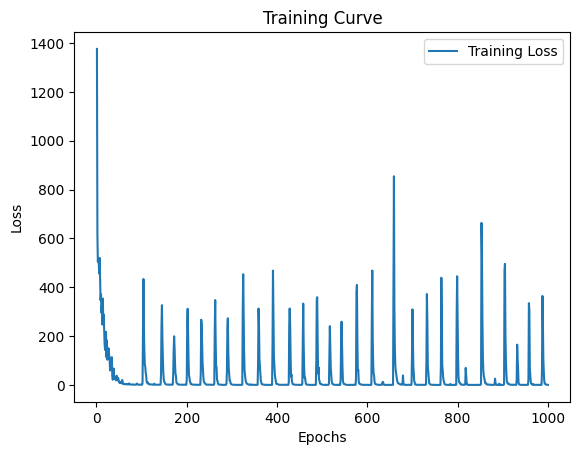

In [13]:
epochs = np.arange(1, num_epochs + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

In [14]:
torch.save(model.state_dict(), 'Classicalmodel.pth') # if you want to save the model

In [15]:
# eval
model = SamRBM(input_dim, num_classes)
model.load_state_dict(torch.load('Classicalmodel.pth'))
model.eval()

# Evaluate the model on the test dataset
test_loss = 0.0
correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for features, labels in test_dataloader:
        outputs = model(features)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
test_loss /= len(test_dataloader)
test_accuracy = correct_predictions / total_predictions
# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%") # NOTE: insufficient dataset for training, just for educational purposes :)

Test Loss: 27.4623
Test Accuracy: 11.54%
